## **Carga de Datos de la Locacion y Limpieza preliminar de Datos**

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import math
import random
import warnings
warnings.filterwarnings("ignore")
import logging
logging.getLogger('fbprophet').setLevel(logging.WARNING)
import gc
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import *
import missingno as msno
import sklearn.neighbors._base
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
#pip install "numpy>=1.16.5,<1.23.0" --user

In [3]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [4]:
from missingpy import MissForest

In [5]:
#Paquetes necesarios para cargar la libreria missingpy
#pip uninstall scikit-learn -y
#pip install pipwin

In [6]:
#Datos de Ingreso para el programa
Input1= 'Estacion01'
Input2= 2019
Input3= 2020

In [7]:
def DataEntry(locacion,ano_inicio,ano_fin):
    #Concatenacion de datos
    Locacion=str(locacion)
    x=ano_inicio
    y=ano_fin
    location_data=pd.DataFrame()
    #path='/Location Data/' (Path en caso se use google collab)
    path='C:/Programa Prediccion/Universidad internacional de Valencia/Location Data/'
    new_columns=['Fecha', 'Hora', 'Temperatura', 'Velocidad', 'Direccion',
          'Direccion_rosa', 'Presion', 'Humedad', 'Precipitacion',
          'Precipitacion_Real', 'Radiacion', 'Evapotranspiracion',
          'Evapo_real', 'Puerta_Abierta', 'Bateria_Baja',
          'Solar_Energia', 'Observaciones']
    for i in range(x,y+1):
        # Con la variable C se coloca el nombre del dataframe
        input1=Locacion+'_'
        c = input1 + str(i)
        # La siguiente linea genera la ruta del csv
        input2 = path+Locacion+'/'
        input3 = str(i) + '_' + Locacion + '.csv'
        v1=input2+input3
        # Generamos los dataframes panda
        data = pd.read_csv(v1,encoding="utf-8", header=2,sep=';')
        old_columns=data.columns
        data.rename(columns=dict(zip(old_columns, new_columns)), inplace=True)
        data.columns=data.columns.str.strip()
        location_data=location_data.append(data,ignore_index=True)

    #Inicio de Limpieza de Datos
    location_data = location_data.replace("-", np.nan)
    location_data = location_data.replace(',','', regex=True)
    location_data.Precipitacion_Real = location_data.Precipitacion_Real.replace('aquí', 0)
    location_data.Precipitacion_Real = location_data.Precipitacion_Real.replace(' Precipita', 0)
    location_data=location_data.replace(".", np.nan)

    #Adecuamos el formato de los datos
    location_data["Fecha"] = pd.to_datetime(location_data["Fecha"])
    ##location_data["Hora"] =  pd.to_datetime(location_data["Hora"]).dt.time
    ##location_data["Direccion"] = location_data["Direccion"].fillna(-91)
    ##location_data["Direccion"] = location_data["Direccion"].astype(int)
    ##location_data["Humedad"] = location_data["Humedad"].fillna(-91)
    ##location_data["Humedad"] = location_data["Humedad"].astype(int)
    ##location_data["Radiacion"] = location_data["Radiacion"].fillna(-91)
    location_data["Radiacion"] = location_data["Radiacion"].astype(float)
    location_data["Precipitacion"] = location_data["Precipitacion"].astype(float)
    location_data["Precipitacion_Real"] = location_data["Precipitacion_Real"].astype(float)
    location_data["Temperatura"] =  location_data["Temperatura"].astype(float)
    location_data["Velocidad"] =  location_data["Velocidad"].astype(float)
    location_data["Presion"] =  location_data["Presion"].astype(float)
    location_data["Humedad"] =  location_data["Humedad"].astype(float)

    #Agregamos el nombre de la Estacion en una columna
    location_data["Estacion"] = locacion

    return location_data

In [8]:
test= DataEntry(Input1,Input2,Input3)

In [9]:
test

,Fecha,Hora,Temperatura,Velocidad,Direccion,Direccion_rosa,Presion,Humedad,Precipitacion,Precipitacion_Real,Radiacion,Evapotranspiracion,Evapo_real,Puerta_Abierta,Bateria_Baja,Solar_Energia,Observaciones,Estacion
0,2019-01-01,00:01:35,19.61,4.02,115,ESE,599.32,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
1,2019-01-01,00:06:36,19.61,3.13,123,ESE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
2,2019-01-01,00:11:37,19.67,3.58,142,SE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
3,2019-01-01,00:16:35,19.56,2.68,122,ESE,599.22,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
4,2019-01-01,00:21:38,19.44,3.58,152,SSE,599.22,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206398,2020-12-31,23:35:39,1802.61,113.99,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206399,2020-12-31,23:40:39,1802.61,113.99,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206400,2020-12-31,23:45:40,1802.61,113.99,32767.00,NaN,603.44,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206401,2020-12-31,23:50:53,1802.61,113.99,32767.00,NaN,603.39,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01


Estacion01


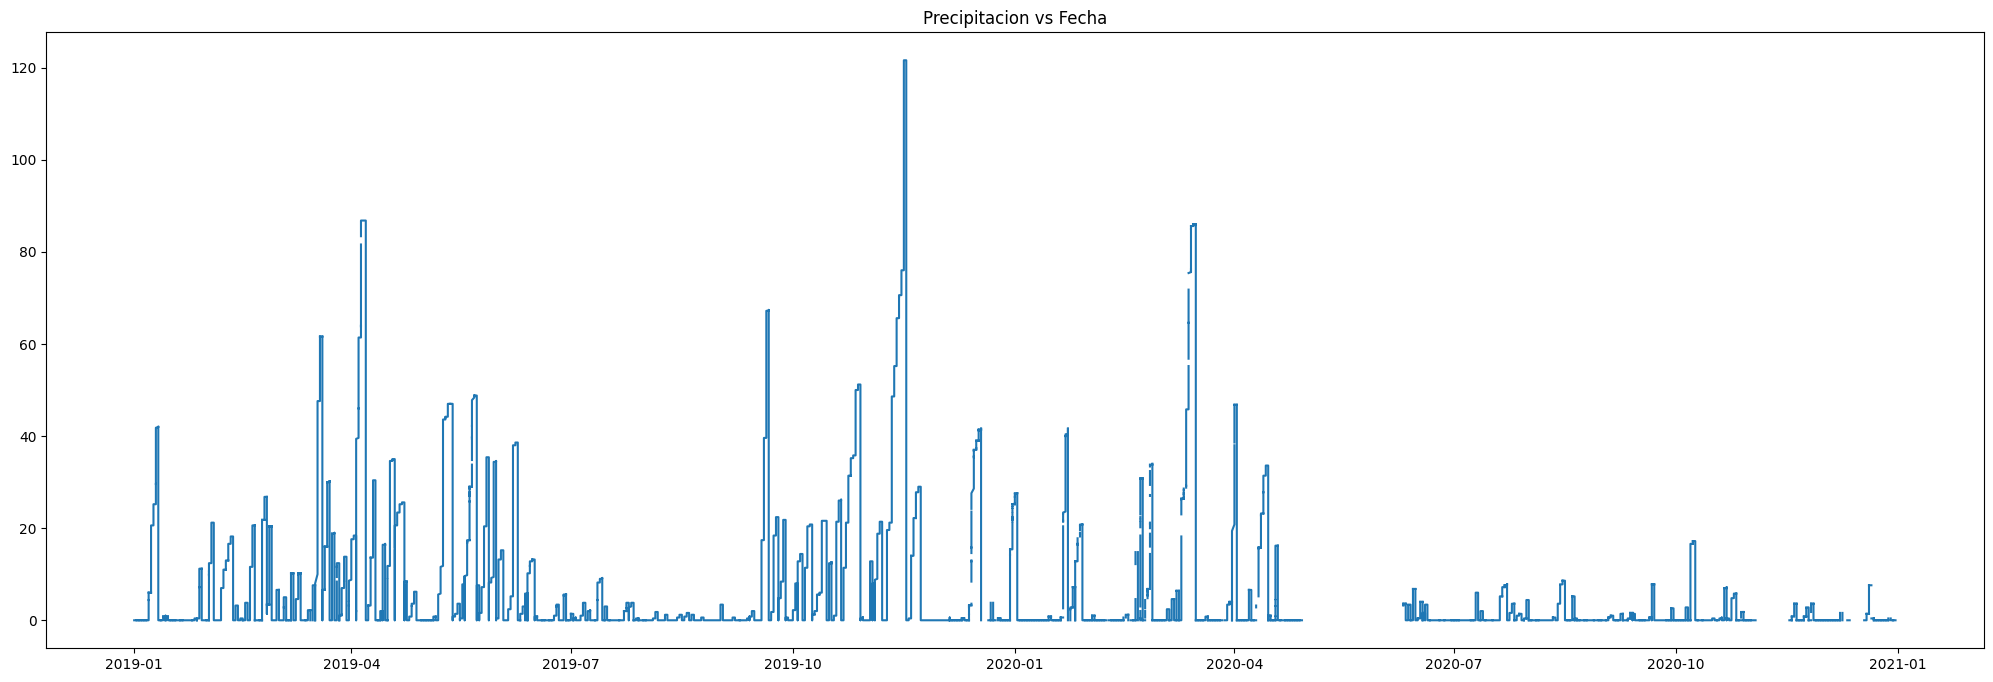

In [10]:
plt.figure(figsize=(25,8))
print(test.Estacion[0])
plt.plot(test.Fecha.sort_values(ascending=True), test["Precipitacion"])
plt.title("Precipitacion vs Fecha")
plt.show()

Estacion Estacion01


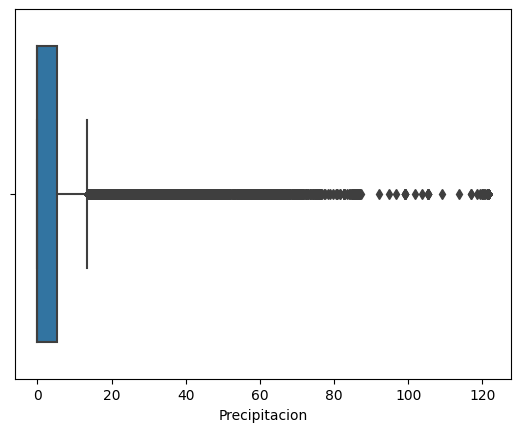

In [11]:
print("Estacion", test.Estacion[0])
sns.boxplot(x ='Precipitacion', data = test)
plt.show()

In [12]:
print(test.Estacion[0])
print(test.Precipitacion.isnull().sum(), "\n")

Estacion01
20728 



## **Tratamiento de valores atipicos - Variable Precipitacion**

Estacion01


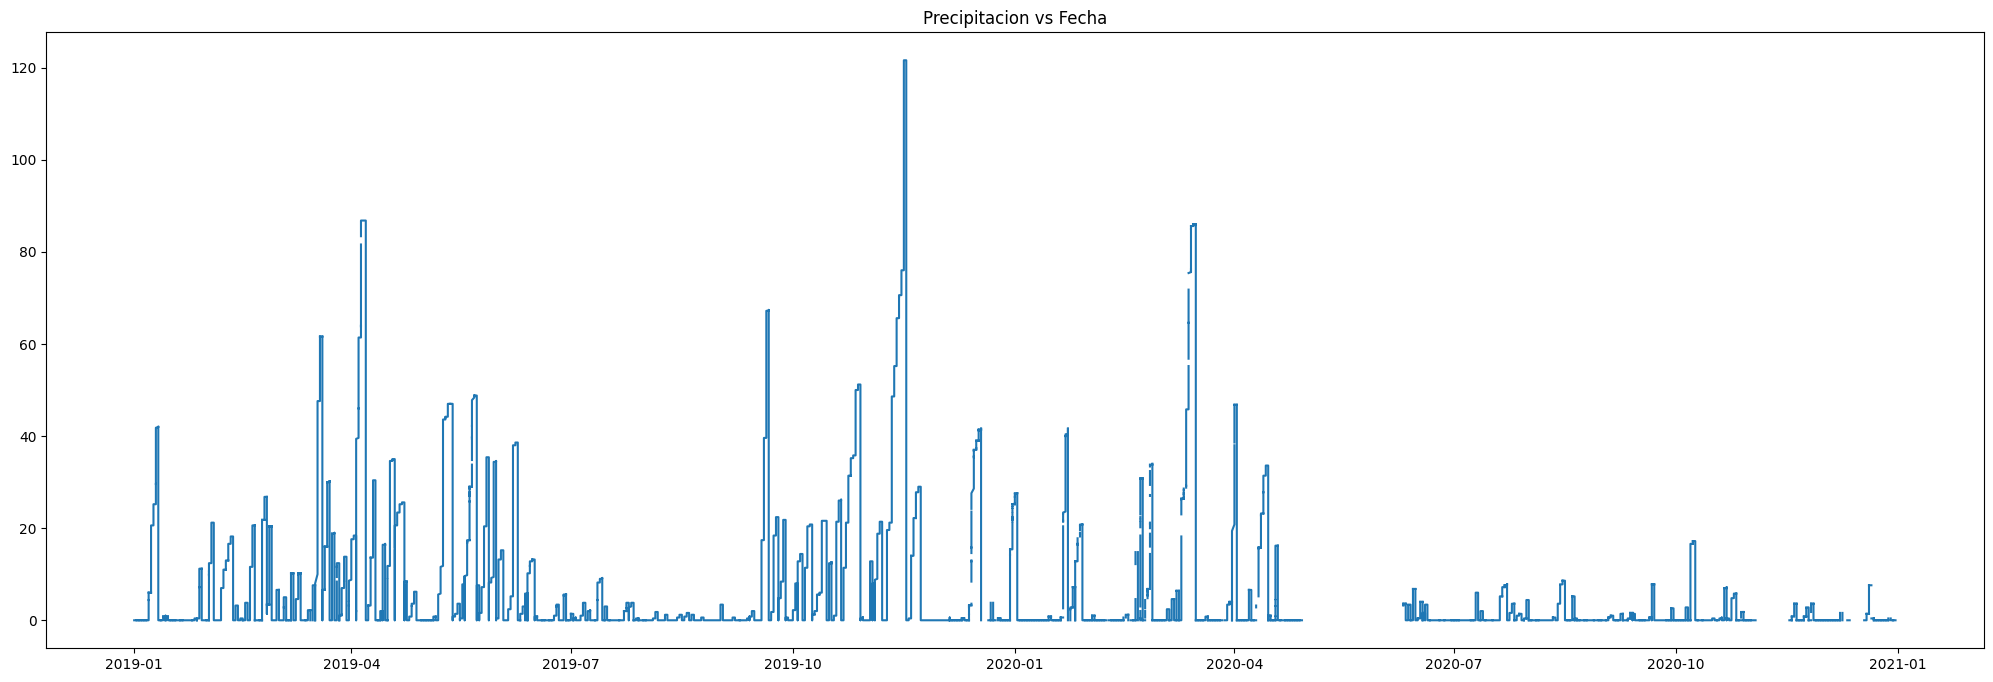

In [13]:
#Ploteamos Precipitacion vs Fecha
plt.figure(figsize=(25,8))
print(test.Estacion[0])
plt.plot(test.Fecha.sort_values(ascending=True), test["Precipitacion"])
plt.title("Precipitacion vs Fecha")
plt.show()

Estacion Estacion01


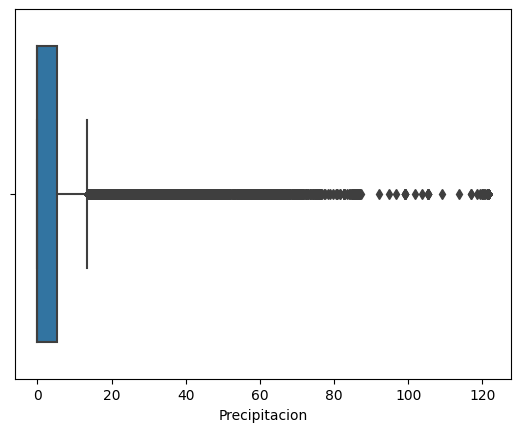

In [14]:
print("Estacion", test.Estacion[0])
sns.boxplot(x ='Precipitacion', data = test)
plt.show()

In [15]:
#Revisamos la cantidad de valores nulos
print(test.Estacion[0])
print(test.Precipitacion.isnull().sum(), "\n")

Estacion01
20728 



In [16]:
#Revisamos el valor minimo de la variable
print(test.Estacion[0])
print(test.Precipitacion.min(), "\n")

Estacion01
0.0 



**Luego de plotear la data, trabajaremos sobre los valore atipicos**

In [17]:
def Outliers_Precipitacion(df,opinion_experto,limite,input_valor):

  df["Precipitacion"] = round(df["Precipitacion"], 1)

 #Para la variable precipitacion es necesaria tener la opinion del experto
  #Si el experto determina valores altos que deban de ser reemplazado por la media o algun valor en especifico
  if opinion_experto=='si':
    df["Precipitacion"] = np.where((df.Precipitacion >limite ), input_valor, df["Precipitacion"])

  return df

In [18]:
Outliers_Precipitacion(test,'si',300,200)

,Fecha,Hora,Temperatura,Velocidad,Direccion,Direccion_rosa,Presion,Humedad,Precipitacion,Precipitacion_Real,Radiacion,Evapotranspiracion,Evapo_real,Puerta_Abierta,Bateria_Baja,Solar_Energia,Observaciones,Estacion
0,2019-01-01,00:01:35,19.61,4.02,115,ESE,599.32,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
1,2019-01-01,00:06:36,19.61,3.13,123,ESE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
2,2019-01-01,00:11:37,19.67,3.58,142,SE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
3,2019-01-01,00:16:35,19.56,2.68,122,ESE,599.22,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
4,2019-01-01,00:21:38,19.44,3.58,152,SSE,599.22,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206398,2020-12-31,23:35:39,1802.61,113.99,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206399,2020-12-31,23:40:39,1802.61,113.99,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206400,2020-12-31,23:45:40,1802.61,113.99,32767.00,NaN,603.44,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206401,2020-12-31,23:50:53,1802.61,113.99,32767.00,NaN,603.39,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01


In [19]:
test['Precipitacion'].describe()

count    185675.000000
mean          6.450090
std          14.177641
min           0.000000
25%           0.000000
50%           0.000000
75%           5.400000
max         121.600000
Name: Precipitacion, dtype: float64

Estacion01


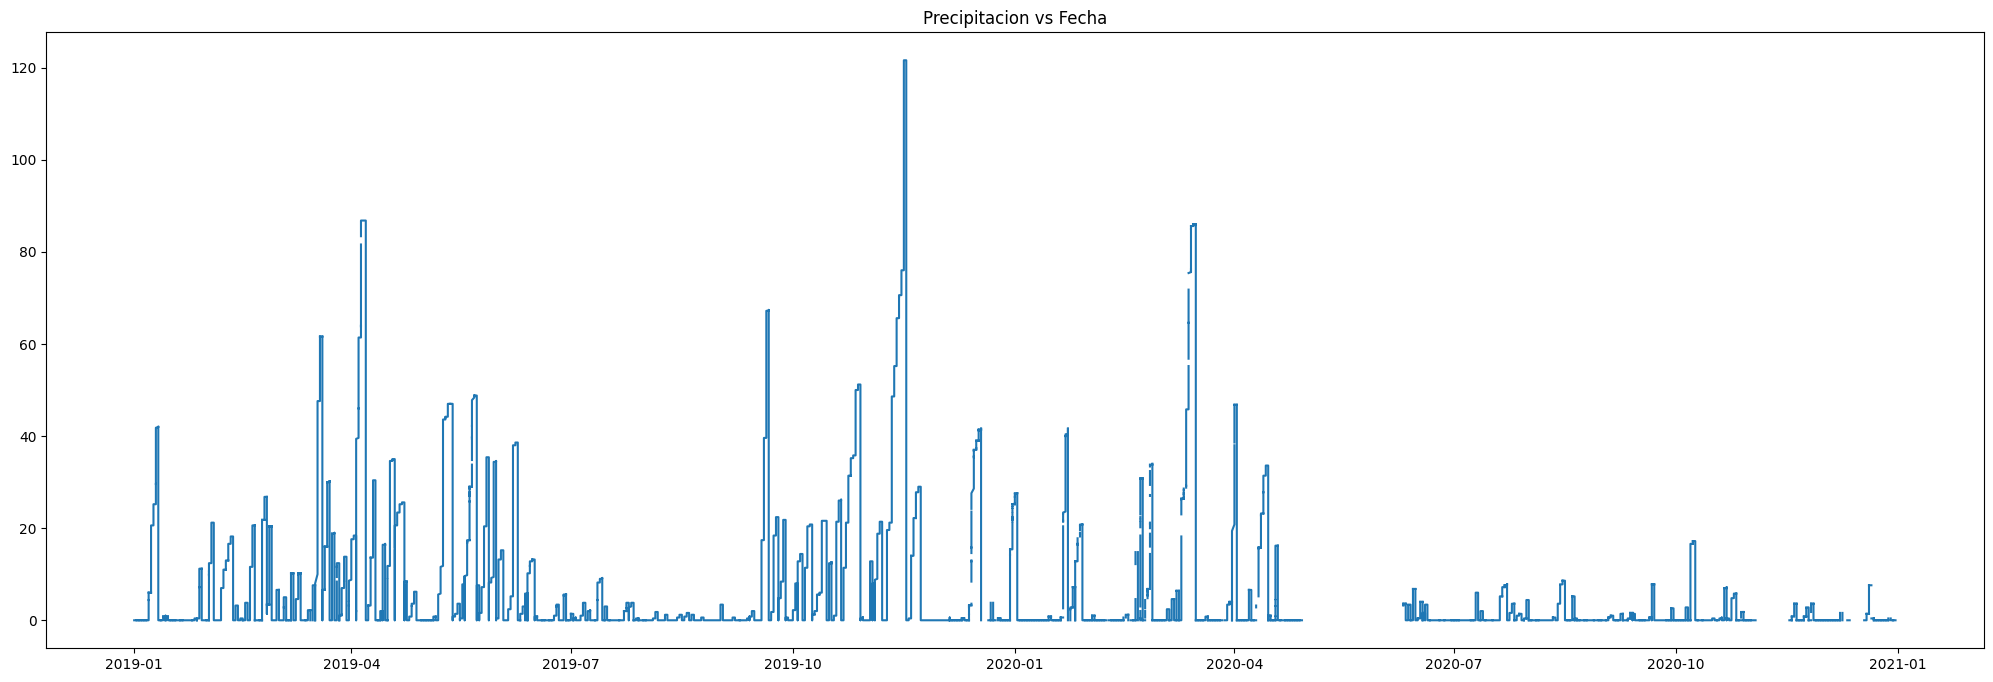

In [20]:
plt.figure(figsize=(25,8))
print(test.Estacion[0])
plt.plot(test.Fecha.sort_values(ascending=True), test["Precipitacion"])
plt.title("Precipitacion vs Fecha")
plt.show()

## **Tratamiento de valores atipicos - Variable Velocidad**

In [21]:
#Funcion para pasar de fecha a string
def funcion_fecha_str(a):
    year=str(a.year)
    month=str(a.month)
    day=str(a.day)
    if len(month)<=1:
      month="0"+month
    if len(day)<=1:
      day="0"+day
    date=year+"-"+month+"-"+day
    return date

#Funcion para pasar de string a fecha
def funcion_str_fecha(a):
    date=datetime.strptime(a,'%Y-%m-%d').date()
    return date

In [22]:
#Funcion que coloca valores random en un intervalo
def randrange_float(start, stop, step):
    return random.randint(0, int((stop - start) / step)) * step + start

In [23]:
def Outliers_Velocidad(df):
    n = 32.6
    st = 1
    step = 0.4
    datasets=[df]

    #Seleccion de Fecha Inicio
    year_ini=str(df.Fecha[1].year)
    month_ini=str(df.Fecha[1].month)
    day_ini=str(df.Fecha[1].day)
    if len(month_ini)<=1:
      month_ini="0"+month_ini
    if len(day_ini)<=1:
      day_ini="0"+day_ini
    ini=year_ini+"-"+month_ini+"-"+day_ini

    #Seleccion de Fecha Fin
    x=len(df.Fecha)-1
    year_fin=str(df.Fecha[x].year)
    month_fin=str(df.Fecha[x].month)
    day_fin=str(df.Fecha[x].day)
    if len(month_fin)<=1:
      month_fin="0"+month_fin
    if len(day_fin)<=1:
      day_fin="0"+day_fin
    fin=year_fin+"-"+month_fin+"-"+day_fin

    #Cantidad de periodos de 90 dias
    a=datetime.strptime(ini, '%Y-%m-%d').date()
    b=datetime.strptime(fin, '%Y-%m-%d').date()
    c=b-a
    periodos=c.days/90
    parte_decimal, parte_entera = math.modf(periodos)
    parte_entera=int(parte_entera)

    #Cantidad de periodos de 90 dias
    for i in range(1,parte_entera+1):
        stop=funcion_str_fecha(ini)+relativedelta(days=+90)
        stop_t=funcion_fecha_str(stop)
        for i in datasets:
            e = len(i)
            promedio = i[(i.Fecha > ini) & (i.Fecha < stop_t) & (i.Velocidad <= n)].Velocidad.mean()
            if math.isnan(promedio) == False :
               if promedio != 0:
                  random.seed(42)
                  promedio = [randrange_float(promedio-st, promedio +st, step) for p in range(e)]
                  promedio = np.round(promedio,1)
                  promedio = pd.DataFrame(promedio, columns=["valor"])
                  i["Velocidad"] = np.where((i.Fecha >= ini) & (i.Fecha <= stop_t) & (i.Velocidad > n), promedio["valor"], i["Velocidad"])
        #start_t=stop_t
        ini=funcion_fecha_str(stop)

    if parte_decimal>0:
       for i in datasets:
            e = len(i)
            promedio = i[(i.Fecha > ini) & (i.Fecha < fin) & (i.Velocidad <= n)].Velocidad.mean()
            if math.isnan(promedio) == False :
               if promedio != 0:
                  random.seed(42)
                  promedio = [randrange_float(promedio-st, promedio +st, step) for p in range(e)]
                  promedio = np.round(promedio,1)
                  promedio = pd.DataFrame(promedio, columns=["valor"])
                  i["Velocidad"] = np.where((i.Fecha >= ini) & (i.Fecha <= fin) & (i.Velocidad > n), promedio["valor"], i["Velocidad"])
    return df

In [24]:
Outliers_Velocidad(test)

,Fecha,Hora,Temperatura,Velocidad,Direccion,Direccion_rosa,Presion,Humedad,Precipitacion,Precipitacion_Real,Radiacion,Evapotranspiracion,Evapo_real,Puerta_Abierta,Bateria_Baja,Solar_Energia,Observaciones,Estacion
0,2019-01-01,00:01:35,19.61,4.02,115,ESE,599.32,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
1,2019-01-01,00:06:36,19.61,3.13,123,ESE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
2,2019-01-01,00:11:37,19.67,3.58,142,SE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
3,2019-01-01,00:16:35,19.56,2.68,122,ESE,599.22,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
4,2019-01-01,00:21:38,19.44,3.58,152,SSE,599.22,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206398,2020-12-31,23:35:39,1802.61,1.60,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206399,2020-12-31,23:40:39,1802.61,-0.40,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206400,2020-12-31,23:45:40,1802.61,0.80,32767.00,NaN,603.44,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206401,2020-12-31,23:50:53,1802.61,1.60,32767.00,NaN,603.39,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01


Estacion01


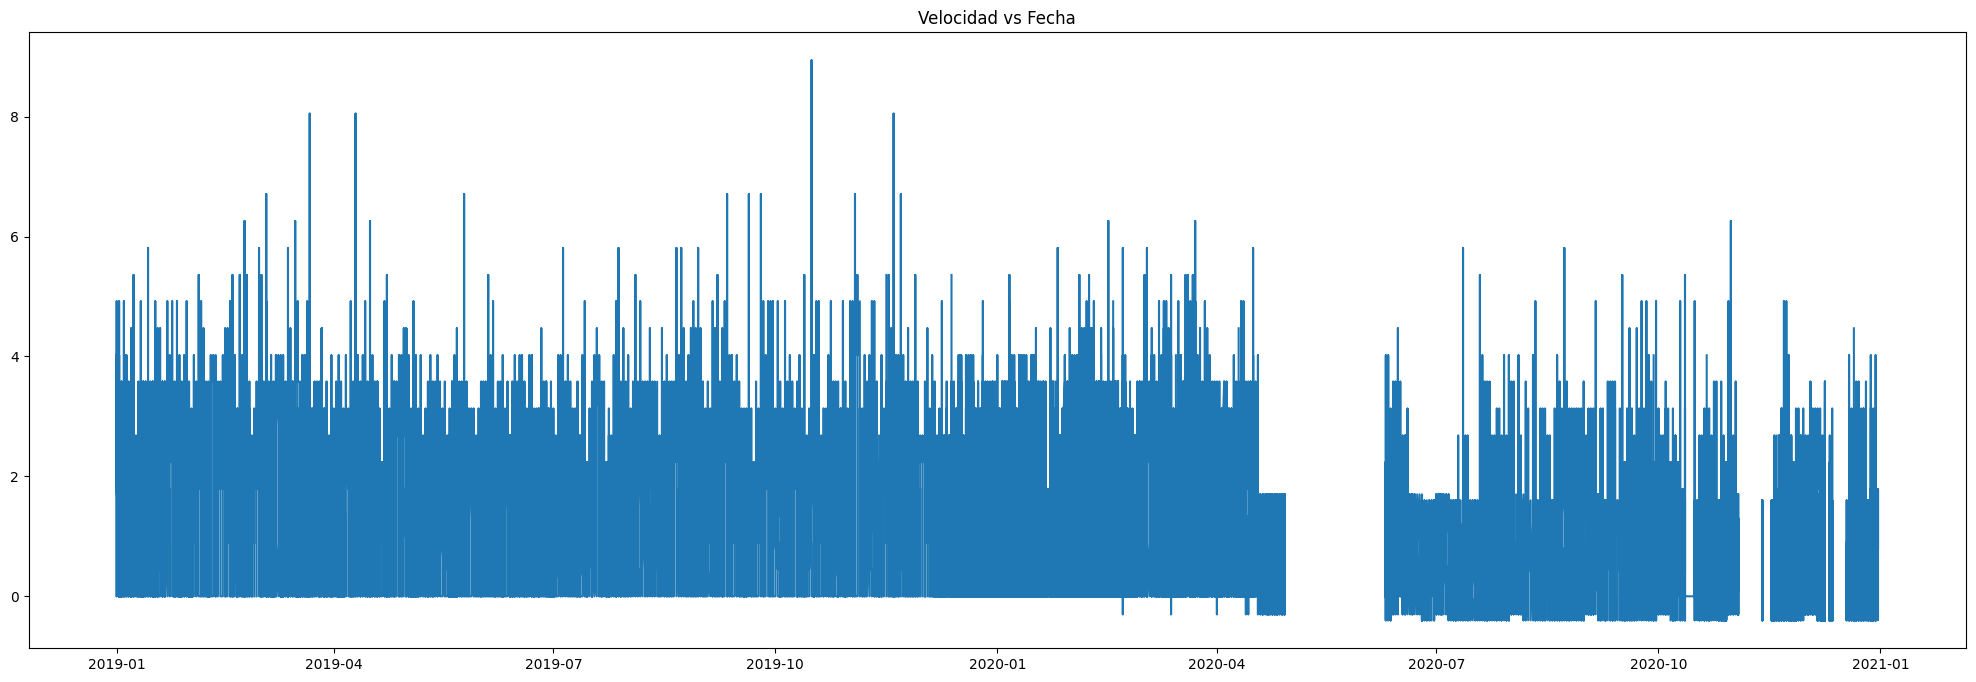

In [25]:
plt.figure(figsize=(25,8))
print(test.Estacion[0])
plt.plot(test.Fecha.sort_values(ascending=True), test["Velocidad"])
plt.title("Velocidad vs Fecha")
plt.show()

## **Tratamiento de valores atipicos - Variable Temperatura**

In [26]:
#Codigo para Valores Atipicos de valores minimos
def Outliers_Temp_min(df):
    n = 15 #Temperatura minima del lugar
    s = 1
    step = 0.8
    datasets=[df]
    for i in datasets:
        e = len(i)
        np.random.seed(42)
        temp = [randrange_float(n, n + s, step) for p in range(e)]
        temp = np.round(temp,2)
        #temp = round(np.random.uniform(7,7+1),2)
        i["Temperatura"] = np.where((i.Temperatura < n), temp, i["Temperatura"])

    return df

In [27]:
#Codigo para Valores Atipicos de valores maximos
def Outliers_Temp_max(df):
    n = 32 #Temperatura maxima del lugar
    st = 1
    step = 0.4
    datasets=[df]

    #Seleccion de Fecha Inicio
    year_ini=str(df.Fecha[1].year)
    month_ini=str(df.Fecha[1].month)
    day_ini=str(df.Fecha[1].day)
    if len(month_ini)<=1:
      month_ini="0"+month_ini
    if len(day_ini)<=1:
      day_ini="0"+day_ini
    ini=year_ini+"-"+month_ini+"-"+day_ini

    #Seleccion de Fecha Fin
    x=len(df.Fecha)-1
    year_fin=str(df.Fecha[x].year)
    month_fin=str(df.Fecha[x].month)
    day_fin=str(df.Fecha[x].day)
    if len(month_fin)<=1:
      month_fin="0"+month_fin
    if len(day_fin)<=1:
      day_fin="0"+day_fin
    fin=year_fin+"-"+month_fin+"-"+day_fin

    #Cantidad de periodos de 120 dias
    a=datetime.strptime(ini, '%Y-%m-%d').date()
    b=datetime.strptime(fin, '%Y-%m-%d').date()
    c=b-a
    periodos=c.days/90
    parte_decimal, parte_entera = math.modf(periodos)
    parte_entera=int(parte_entera)

    #Cantidad de periodos de 120 dias
    for i in range(1,parte_entera+1):
        stop=funcion_str_fecha(ini)+relativedelta(days=+90)
        stop_t=funcion_fecha_str(stop)
        for i in datasets:
            e = len(i)
            promedio = i[(i.Fecha > ini) & (i.Fecha < stop_t) & (i.Temperatura <= n)].Temperatura.mean()
            if math.isnan(promedio) == False :
               if promedio != 0:
                  random.seed(42)
                  promedio = [randrange_float(promedio-st, promedio +st, step) for p in range(e)]
                  promedio = np.round(promedio,1)
                  promedio = pd.DataFrame(promedio, columns=["valor"])
                  i["Temperatura"] = np.where((i.Fecha >= ini) & (i.Fecha <= stop_t) & (i.Temperatura > n), promedio["valor"], i["Temperatura"])
        #start_t=stop_t
        ini=funcion_fecha_str(stop)

    if parte_decimal>0:
       for i in datasets:
            e = len(i)
            promedio = i[(i.Fecha > ini) & (i.Fecha < fin) & (i.Velocidad <= n)].Velocidad.mean()
            if math.isnan(promedio) == False :
               if promedio != 0:
                  random.seed(42)
                  promedio = [randrange_float(promedio-st, promedio +st, step) for p in range(e)]
                  promedio = np.round(promedio,1)
                  promedio = pd.DataFrame(promedio, columns=["valor"])
                  i["Temperatura"] = np.where((i.Fecha >= ini) & (i.Fecha <= fin) & (i.Temperatura > n), promedio["valor"], i["Temperatura"])
    return df

In [28]:
Outliers_Temp_min(test)

,Fecha,Hora,Temperatura,Velocidad,Direccion,Direccion_rosa,Presion,Humedad,Precipitacion,Precipitacion_Real,Radiacion,Evapotranspiracion,Evapo_real,Puerta_Abierta,Bateria_Baja,Solar_Energia,Observaciones,Estacion
0,2019-01-01,00:01:35,19.61,4.02,115,ESE,599.32,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
1,2019-01-01,00:06:36,19.61,3.13,123,ESE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
2,2019-01-01,00:11:37,19.67,3.58,142,SE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
3,2019-01-01,00:16:35,19.56,2.68,122,ESE,599.22,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
4,2019-01-01,00:21:38,19.44,3.58,152,SSE,599.22,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206398,2020-12-31,23:35:39,1802.61,1.60,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206399,2020-12-31,23:40:39,1802.61,-0.40,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206400,2020-12-31,23:45:40,1802.61,0.80,32767.00,NaN,603.44,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206401,2020-12-31,23:50:53,1802.61,1.60,32767.00,NaN,603.39,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01


In [29]:
Outliers_Temp_max(test)

,Fecha,Hora,Temperatura,Velocidad,Direccion,Direccion_rosa,Presion,Humedad,Precipitacion,Precipitacion_Real,Radiacion,Evapotranspiracion,Evapo_real,Puerta_Abierta,Bateria_Baja,Solar_Energia,Observaciones,Estacion
0,2019-01-01,00:01:35,19.61,4.02,115,ESE,599.32,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
1,2019-01-01,00:06:36,19.61,3.13,123,ESE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
2,2019-01-01,00:11:37,19.67,3.58,142,SE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
3,2019-01-01,00:16:35,19.56,2.68,122,ESE,599.22,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
4,2019-01-01,00:21:38,19.44,3.58,152,SSE,599.22,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206398,2020-12-31,23:35:39,1.60,1.60,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206399,2020-12-31,23:40:39,-0.40,-0.40,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206400,2020-12-31,23:45:40,0.80,0.80,32767.00,NaN,603.44,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206401,2020-12-31,23:50:53,1.60,1.60,32767.00,NaN,603.39,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01


Estacion01


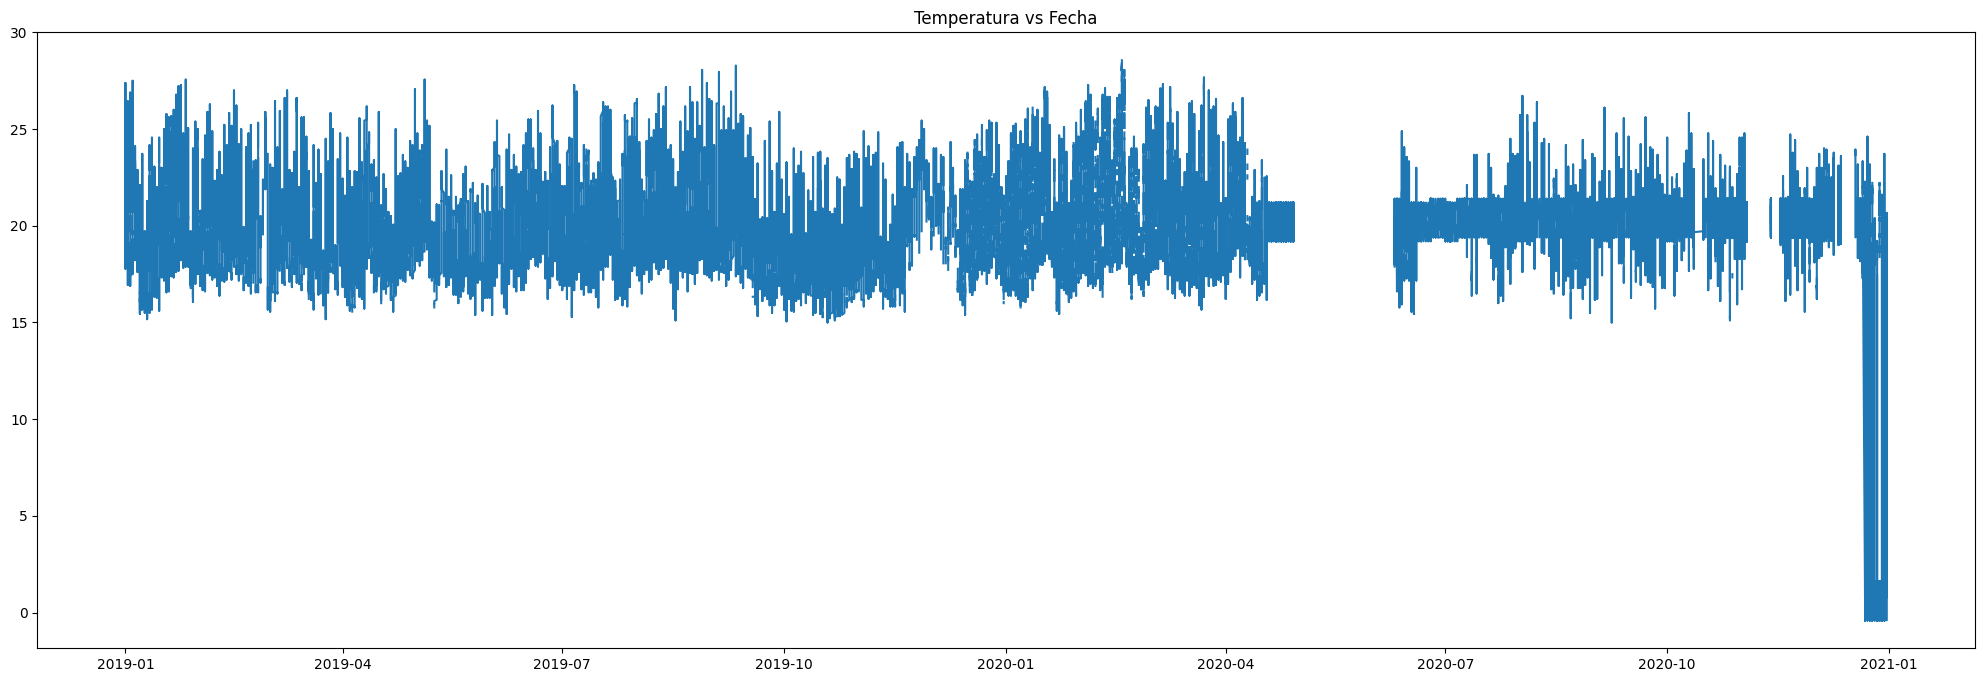

In [30]:
plt.figure(figsize=(25,8))
print(test.Estacion[0])
plt.plot(test.Fecha.sort_values(ascending=True), test["Temperatura"])
plt.title("Temperatura vs Fecha")
plt.show()

## **Tratamiento de valores atipicos - Variable Presion Barometrica**

In [31]:
#Codigo para Valores de Presiones iguales a cero
def Outliers_Presion(df):
    n = 0
    datasets=[df]
    for i in datasets:
        promedio = i[(i.Presion != n)].Presion.mean()
        i["Presion"] = np.where((i.Presion == n), promedio, i["Presion"])

    return df

Estacion01


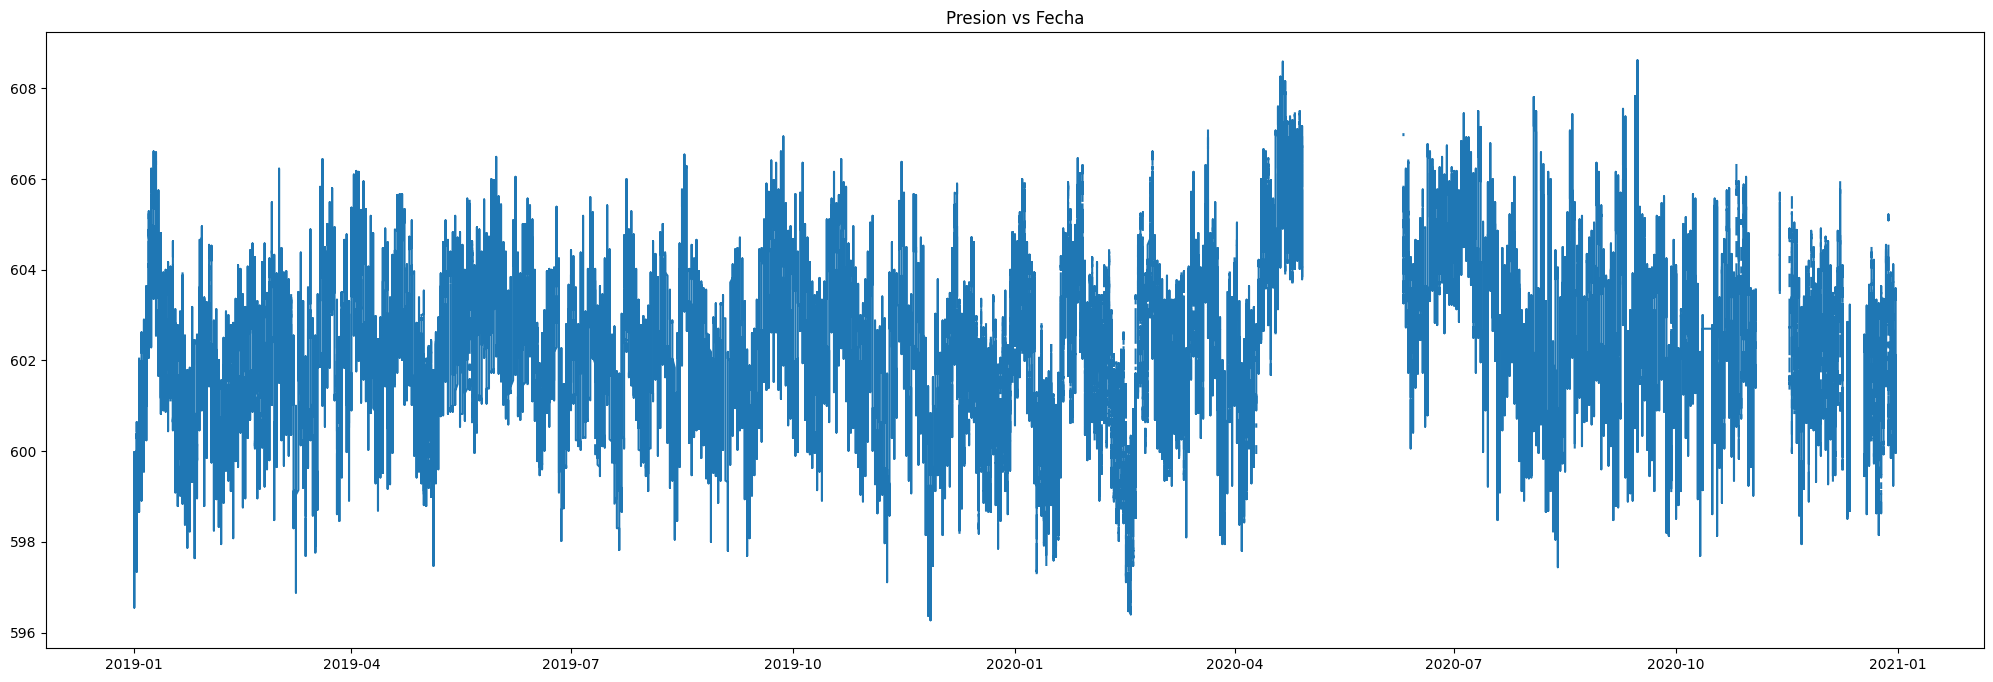

In [32]:
plt.figure(figsize=(25,8))
print(test.Estacion[0])
plt.plot(test.Fecha.sort_values(ascending=True), test["Presion"])
plt.title("Presion vs Fecha")
plt.show()

In [33]:
test

,Fecha,Hora,Temperatura,Velocidad,Direccion,Direccion_rosa,Presion,Humedad,Precipitacion,Precipitacion_Real,Radiacion,Evapotranspiracion,Evapo_real,Puerta_Abierta,Bateria_Baja,Solar_Energia,Observaciones,Estacion
0,2019-01-01,00:01:35,19.61,4.02,115,ESE,599.32,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
1,2019-01-01,00:06:36,19.61,3.13,123,ESE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
2,2019-01-01,00:11:37,19.67,3.58,142,SE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
3,2019-01-01,00:16:35,19.56,2.68,122,ESE,599.22,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
4,2019-01-01,00:21:38,19.44,3.58,152,SSE,599.22,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206398,2020-12-31,23:35:39,1.60,1.60,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206399,2020-12-31,23:40:39,-0.40,-0.40,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206400,2020-12-31,23:45:40,0.80,0.80,32767.00,NaN,603.44,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206401,2020-12-31,23:50:53,1.60,1.60,32767.00,NaN,603.39,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01


In [34]:
Outliers_Presion(test)

,Fecha,Hora,Temperatura,Velocidad,Direccion,Direccion_rosa,Presion,Humedad,Precipitacion,Precipitacion_Real,Radiacion,Evapotranspiracion,Evapo_real,Puerta_Abierta,Bateria_Baja,Solar_Energia,Observaciones,Estacion
0,2019-01-01,00:01:35,19.61,4.02,115,ESE,599.32,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
1,2019-01-01,00:06:36,19.61,3.13,123,ESE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
2,2019-01-01,00:11:37,19.67,3.58,142,SE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
3,2019-01-01,00:16:35,19.56,2.68,122,ESE,599.22,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
4,2019-01-01,00:21:38,19.44,3.58,152,SSE,599.22,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206398,2020-12-31,23:35:39,1.60,1.60,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206399,2020-12-31,23:40:39,-0.40,-0.40,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206400,2020-12-31,23:45:40,0.80,0.80,32767.00,NaN,603.44,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206401,2020-12-31,23:50:53,1.60,1.60,32767.00,NaN,603.39,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01


## **Tratamiento de valores atipicos - Variable Humedad**

In [35]:
#Codigo para Valores Atipicos de valores mayores a 100%
def Outliers_Humedad(df):
    n = 100
    st = 1
    step = 0.4
    datasets=[df]

    #Seleccion de Fecha Inicio
    year_ini=str(df.Fecha[1].year)
    month_ini=str(df.Fecha[1].month)
    day_ini=str(df.Fecha[1].day)
    if len(month_ini)<=1:
      month_ini="0"+month_ini
    if len(day_ini)<=1:
      day_ini="0"+day_ini
    ini=year_ini+"-"+month_ini+"-"+day_ini

    #Seleccion de Fecha Fin
    x=len(df.Fecha)-1
    year_fin=str(df.Fecha[x].year)
    month_fin=str(df.Fecha[x].month)
    day_fin=str(df.Fecha[x].day)
    if len(month_fin)<=1:
      month_fin="0"+month_fin
    if len(day_fin)<=1:
      day_fin="0"+day_fin
    fin=year_fin+"-"+month_fin+"-"+day_fin

    #Cantidad de periodos de 120 dias
    a=datetime.strptime(ini, '%Y-%m-%d').date()
    b=datetime.strptime(fin, '%Y-%m-%d').date()
    c=b-a
    periodos=c.days/90
    parte_decimal, parte_entera = math.modf(periodos)
    parte_entera=int(parte_entera)

    #Cantidad de periodos de 120 dias
    for i in range(1,parte_entera+1):
        stop=funcion_str_fecha(ini)+relativedelta(days=+90)
        stop_t=funcion_fecha_str(stop)
        for i in datasets:
            e = len(i)
            promedio = i[(i.Fecha > ini) & (i.Fecha < stop_t) & (i.Humedad <= n)].Humedad.mean()
            if math.isnan(promedio) == False :
               if promedio != 0:
                  random.seed(42)
                  promedio = [randrange_float(promedio-st, promedio +st, step) for p in range(e)]
                  promedio = np.round(promedio,1)
                  promedio = pd.DataFrame(promedio, columns=["valor"])
                  i["Humedad"] = np.where((i.Fecha >= ini) & (i.Fecha <= stop_t) & (i.Humedad > n), promedio["valor"], i["Humedad"])
        #start_t=stop_t
        ini=funcion_fecha_str(stop)

    if parte_decimal>0:
       for i in datasets:
            e = len(i)
            promedio = i[(i.Fecha > ini) & (i.Fecha < fin) & (i.Humedad <= n)].Humedad.mean()
            if math.isnan(promedio) == False :
               if promedio != 0:
                  random.seed(42)
                  promedio = [randrange_float(promedio-st, promedio +st, step) for p in range(e)]
                  promedio = np.round(promedio,1)
                  promedio = pd.DataFrame(promedio, columns=["valor"])
                  i["Humedad"] = np.where((i.Fecha >= ini) & (i.Fecha <= fin) & (i.Humedad > n), promedio["valor"], i["Humedad"])
    return df

In [36]:
test

,Fecha,Hora,Temperatura,Velocidad,Direccion,Direccion_rosa,Presion,Humedad,Precipitacion,Precipitacion_Real,Radiacion,Evapotranspiracion,Evapo_real,Puerta_Abierta,Bateria_Baja,Solar_Energia,Observaciones,Estacion
0,2019-01-01,00:01:35,19.61,4.02,115,ESE,599.32,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
1,2019-01-01,00:06:36,19.61,3.13,123,ESE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
2,2019-01-01,00:11:37,19.67,3.58,142,SE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
3,2019-01-01,00:16:35,19.56,2.68,122,ESE,599.22,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
4,2019-01-01,00:21:38,19.44,3.58,152,SSE,599.22,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206398,2020-12-31,23:35:39,1.60,1.60,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206399,2020-12-31,23:40:39,-0.40,-0.40,32767.00,NaN,603.46,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206400,2020-12-31,23:45:40,0.80,0.80,32767.00,NaN,603.44,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206401,2020-12-31,23:50:53,1.60,1.60,32767.00,NaN,603.39,255.0,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01


In [37]:
Outliers_Humedad(test)

,Fecha,Hora,Temperatura,Velocidad,Direccion,Direccion_rosa,Presion,Humedad,Precipitacion,Precipitacion_Real,Radiacion,Evapotranspiracion,Evapo_real,Puerta_Abierta,Bateria_Baja,Solar_Energia,Observaciones,Estacion
0,2019-01-01,00:01:35,19.61,4.02,115,ESE,599.32,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
1,2019-01-01,00:06:36,19.61,3.13,123,ESE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
2,2019-01-01,00:11:37,19.67,3.58,142,SE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
3,2019-01-01,00:16:35,19.56,2.68,122,ESE,599.22,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
4,2019-01-01,00:21:38,19.44,3.58,152,SSE,599.22,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206398,2020-12-31,23:35:39,1.60,1.60,32767.00,NaN,603.46,84.1,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206399,2020-12-31,23:40:39,-0.40,-0.40,32767.00,NaN,603.46,82.1,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206400,2020-12-31,23:45:40,0.80,0.80,32767.00,NaN,603.44,83.3,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206401,2020-12-31,23:50:53,1.60,1.60,32767.00,NaN,603.39,84.1,0.0,0.0,32767.0,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01


Estacion01


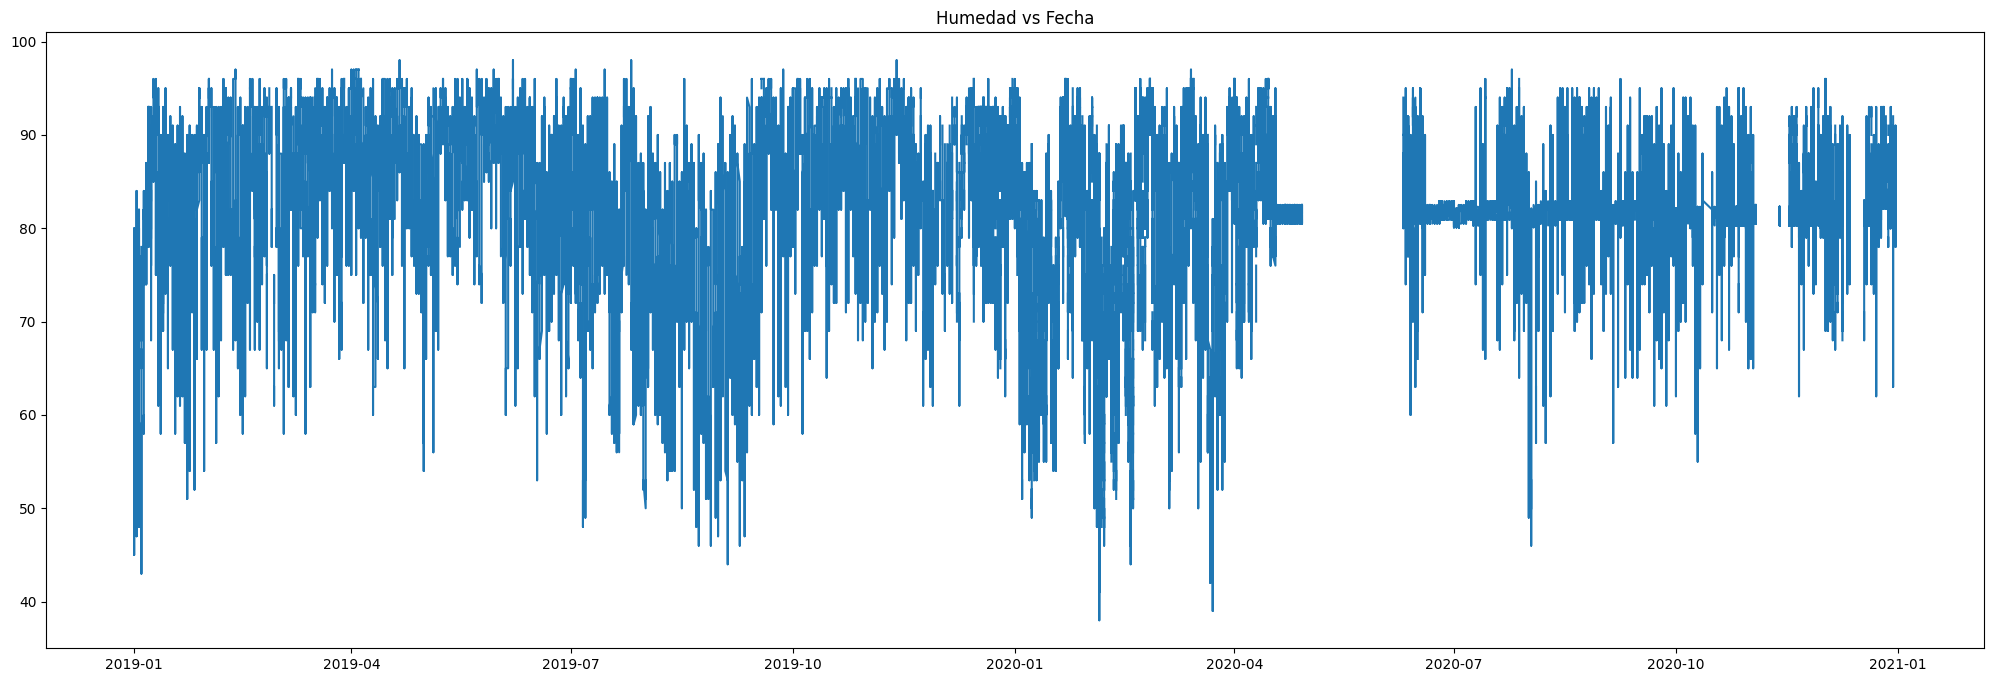

In [38]:
plt.figure(figsize=(25,8))
print(test.Estacion[0])
plt.plot(test.Fecha.sort_values(ascending=True), test["Humedad"])
plt.title("Humedad vs Fecha")
plt.show()

## **Tratamiento de valores atipicos - Variable Radiacion**

In [39]:
#Codigo para Valores Atipicos de valores maximos
def Outliers_Radiacion(df):
    n = 1500
    st = 100
    step = 0.4
    datasets=[df]

    #Seleccion de Fecha Inicio
    year_ini=str(df.Fecha[1].year)
    month_ini=str(df.Fecha[1].month)
    day_ini=str(df.Fecha[1].day)
    if len(month_ini)<=1:
      month_ini="0"+month_ini
    if len(day_ini)<=1:
      day_ini="0"+day_ini
    ini=year_ini+"-"+month_ini+"-"+day_ini

    #Seleccion de Fecha Fin
    x=len(df.Fecha)-1
    year_fin=str(df.Fecha[x].year)
    month_fin=str(df.Fecha[x].month)
    day_fin=str(df.Fecha[x].day)
    if len(month_fin)<=1:
      month_fin="0"+month_fin
    if len(day_fin)<=1:
      day_fin="0"+day_fin
    fin=year_fin+"-"+month_fin+"-"+day_fin

    #Cantidad de periodos de 90 dias
    a=datetime.strptime(ini, '%Y-%m-%d').date()
    b=datetime.strptime(fin, '%Y-%m-%d').date()
    c=b-a
    periodos=c.days/90
    parte_decimal, parte_entera = math.modf(periodos)
    parte_entera=int(parte_entera)

    #Cantidad de periodos de 120 dias
    for i in range(1,parte_entera+1):
        stop=funcion_str_fecha(ini)+relativedelta(days=+90)
        stop_t=funcion_fecha_str(stop)
        for i in datasets:
            e = len(i)
            promedio = i[(i.Fecha > ini) & (i.Fecha < stop_t) & (i.Radiacion <= n)].Radiacion.mean()
            if math.isnan(promedio) == False :
               if promedio != 0:
                  random.seed(42)
                  promedio = [randrange_float(promedio-st, promedio +st, step) for p in range(e)]
                  promedio = np.round(promedio,1)
                  promedio = pd.DataFrame(promedio, columns=["valor"])
                  i["Radiacion"] = np.where((i.Fecha >= ini) & (i.Fecha <= stop_t) & (i.Radiacion > n), promedio["valor"], i["Radiacion"])
        #start_t=stop_t
        ini=funcion_fecha_str(stop)

    if parte_decimal>0:
       for i in datasets:
            e = len(i)
            promedio = i[(i.Fecha > ini) & (i.Fecha < fin) & (i.Radiacion <= n)].Radiacion.mean()
            if math.isnan(promedio) == False :
               if promedio != 0:
                  random.seed(42)
                  promedio = [randrange_float(promedio-st, promedio +st, step) for p in range(e)]
                  promedio = np.round(promedio,1)
                  promedio = pd.DataFrame(promedio, columns=["valor"])
                  i["Radiacion"] = np.where((i.Fecha >= ini) & (i.Fecha <= fin) & (i.Radiacion > n), promedio["valor"], i["Radiacion"])
    return df

In [40]:
Outliers_Radiacion(test)

,Fecha,Hora,Temperatura,Velocidad,Direccion,Direccion_rosa,Presion,Humedad,Precipitacion,Precipitacion_Real,Radiacion,Evapotranspiracion,Evapo_real,Puerta_Abierta,Bateria_Baja,Solar_Energia,Observaciones,Estacion
0,2019-01-01,00:01:35,19.61,4.02,115,ESE,599.32,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
1,2019-01-01,00:06:36,19.61,3.13,123,ESE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
2,2019-01-01,00:11:37,19.67,3.58,142,SE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
3,2019-01-01,00:16:35,19.56,2.68,122,ESE,599.22,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
4,2019-01-01,00:21:38,19.44,3.58,152,SSE,599.22,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206398,2020-12-31,23:35:39,1.60,1.60,32767.00,NaN,603.46,84.1,0.0,0.0,484.3,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206399,2020-12-31,23:40:39,-0.40,-0.40,32767.00,NaN,603.46,82.1,0.0,0.0,472.3,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206400,2020-12-31,23:45:40,0.80,0.80,32767.00,NaN,603.44,83.3,0.0,0.0,327.5,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206401,2020-12-31,23:50:53,1.60,1.60,32767.00,NaN,603.39,84.1,0.0,0.0,442.7,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01


Estacion01


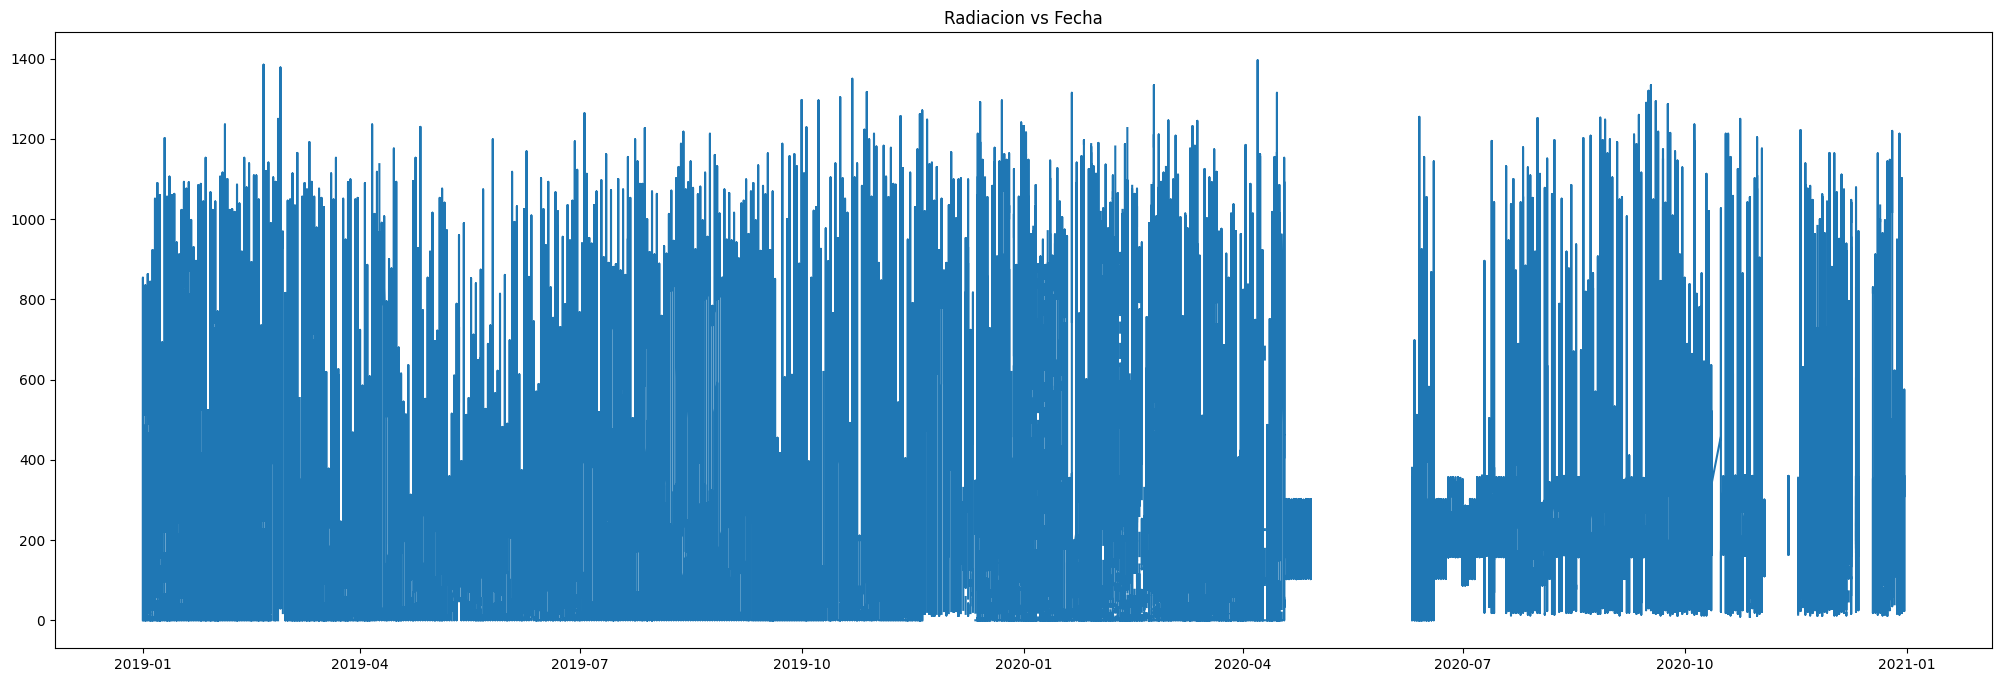

In [41]:
plt.figure(figsize=(25,8))
print(test.Estacion[0])
plt.plot(test.Fecha.sort_values(ascending=True), test["Radiacion"])
plt.title("Radiacion vs Fecha")
plt.show()

In [42]:
test

,Fecha,Hora,Temperatura,Velocidad,Direccion,Direccion_rosa,Presion,Humedad,Precipitacion,Precipitacion_Real,Radiacion,Evapotranspiracion,Evapo_real,Puerta_Abierta,Bateria_Baja,Solar_Energia,Observaciones,Estacion
0,2019-01-01,00:01:35,19.61,4.02,115,ESE,599.32,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
1,2019-01-01,00:06:36,19.61,3.13,123,ESE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
2,2019-01-01,00:11:37,19.67,3.58,142,SE,599.27,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
3,2019-01-01,00:16:35,19.56,2.68,122,ESE,599.22,66.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
4,2019-01-01,00:21:38,19.44,3.58,152,SSE,599.22,67.0,0.0,0.0,0.0,0.15,0,False,False,False,NaN,Estacion01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206398,2020-12-31,23:35:39,1.60,1.60,32767.00,NaN,603.46,84.1,0.0,0.0,484.3,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206399,2020-12-31,23:40:39,-0.40,-0.40,32767.00,NaN,603.46,82.1,0.0,0.0,472.3,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206400,2020-12-31,23:45:40,0.80,0.80,32767.00,NaN,603.44,83.3,0.0,0.0,327.5,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01
206401,2020-12-31,23:50:53,1.60,1.60,32767.00,NaN,603.39,84.1,0.0,0.0,442.7,0,0,False,False,false,|ROSA DE LOS VIENTOS es inconsistente,Estacion01


## **Imputacion de Datos Nulos**

In [43]:
#Funcion para imputacion de Datos Nulos
def Imputacion_Nulos(df):
    data = pd.DataFrame()
    data = df[["Fecha","Hora","Temperatura","Velocidad","Presion","Humedad","Precipitacion","Radiacion"]]
    data["Fecha"] = pd.to_datetime(data["Fecha"])
    data["year"] = df["Fecha"].dt.year
    data["month"] = df["Fecha"].dt.month
    data["day"] = df["Fecha"].dt.day
    data = data.drop(columns={"Fecha"}, axis = 1)
    return data

In [44]:
datas = Imputacion_Nulos(test)

In [45]:
datas.dtypes

Hora              object
Temperatura      float64
Velocidad        float64
Presion          float64
Humedad          float64
Precipitacion    float64
Radiacion        float64
year               int64
month              int64
day                int64
dtype: object

In [46]:
data1=datas[["Temperatura","Velocidad","Presion","Humedad","Precipitacion","Radiacion","year","month","day"]]
data2=datas[["Hora"]]

In [47]:
data3=test[["Fecha"]]

In [48]:
imputer = MissForest()

In [49]:
data_imputed = imputer.fit_transform(data1)

Iteration: 0
Iteration: 1
Iteration: 2


In [50]:
df_imputed = pd.DataFrame(data_imputed)

In [51]:
col_list = tuple(data1.columns.values)

In [52]:
old_col_names = tuple(df_imputed.columns.values)

In [53]:
df_imputed.rename(
    columns={i:j for i,j in zip(old_col_names,col_list)}, inplace=True
) 

In [54]:
df_imputed = df_imputed.astype({"year": int,"month": int,"day": int})

In [55]:
#Result es la data final ordenada, sin outliers y datos nulos
result = pd.concat([data2 , df_imputed], axis=1)

In [56]:
#Se agrega la columna estacion, el cual es un dato inicial en el codigo
result["Estacion"]=Input1

In [57]:
#Se agrega la columna Fecha en formato datetime para utilizarse en el modelo
df=result
df["Fecha-str"]=df["year"].astype(str)+"-"+df["month"].astype(str)+"-"+df["day"].astype(str)+" "+df["Hora"].astype(str)
df["Fecha-str"]=df["Fecha-str"].astype('string') 
df["Fecha"] = pd.to_datetime(df["Fecha-str"])
df = df.drop(columns={"Fecha-str"}, axis = 1)

Text(0.5, 1.0, 'Datos iniciales de la Presion')

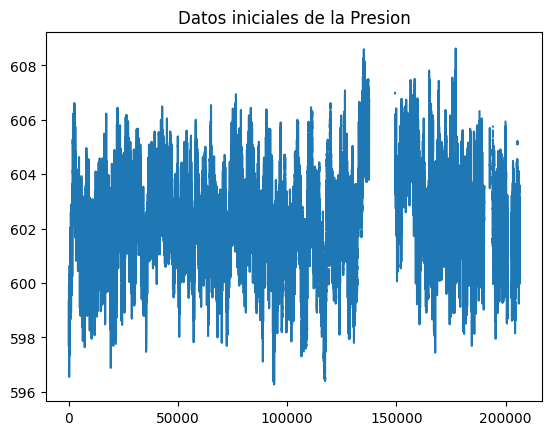

In [58]:
datas.Presion.plot()
plt.title("Datos iniciales de la Presion")

Text(0.5, 1.0, 'Datos finales de la Presion')

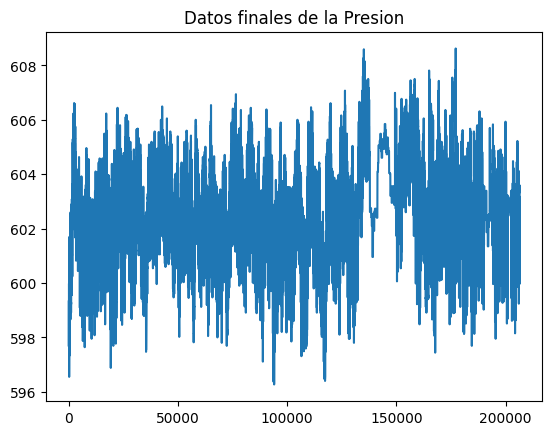

In [59]:
df.Presion.plot()  
plt.title("Datos finales de la Presion")

Estacion01


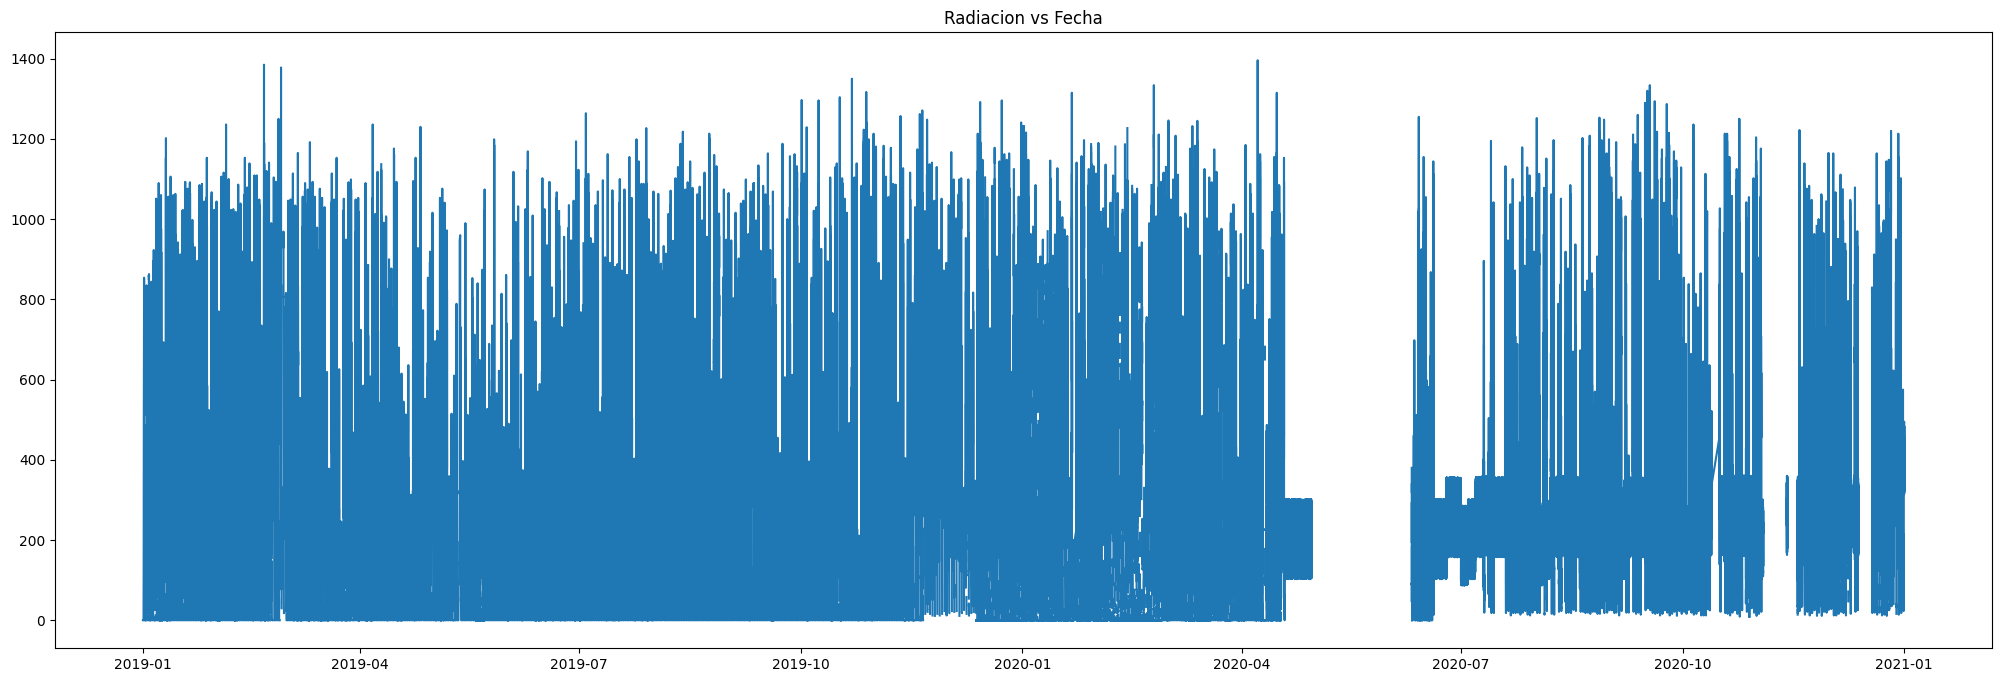

In [60]:
plt.figure(figsize=(25,8))
print(test.Estacion[0])
plt.plot(df.Fecha.sort_values(ascending=True),test["Radiacion"])
plt.title("Radiacion vs Fecha")
plt.show()

Estacion01


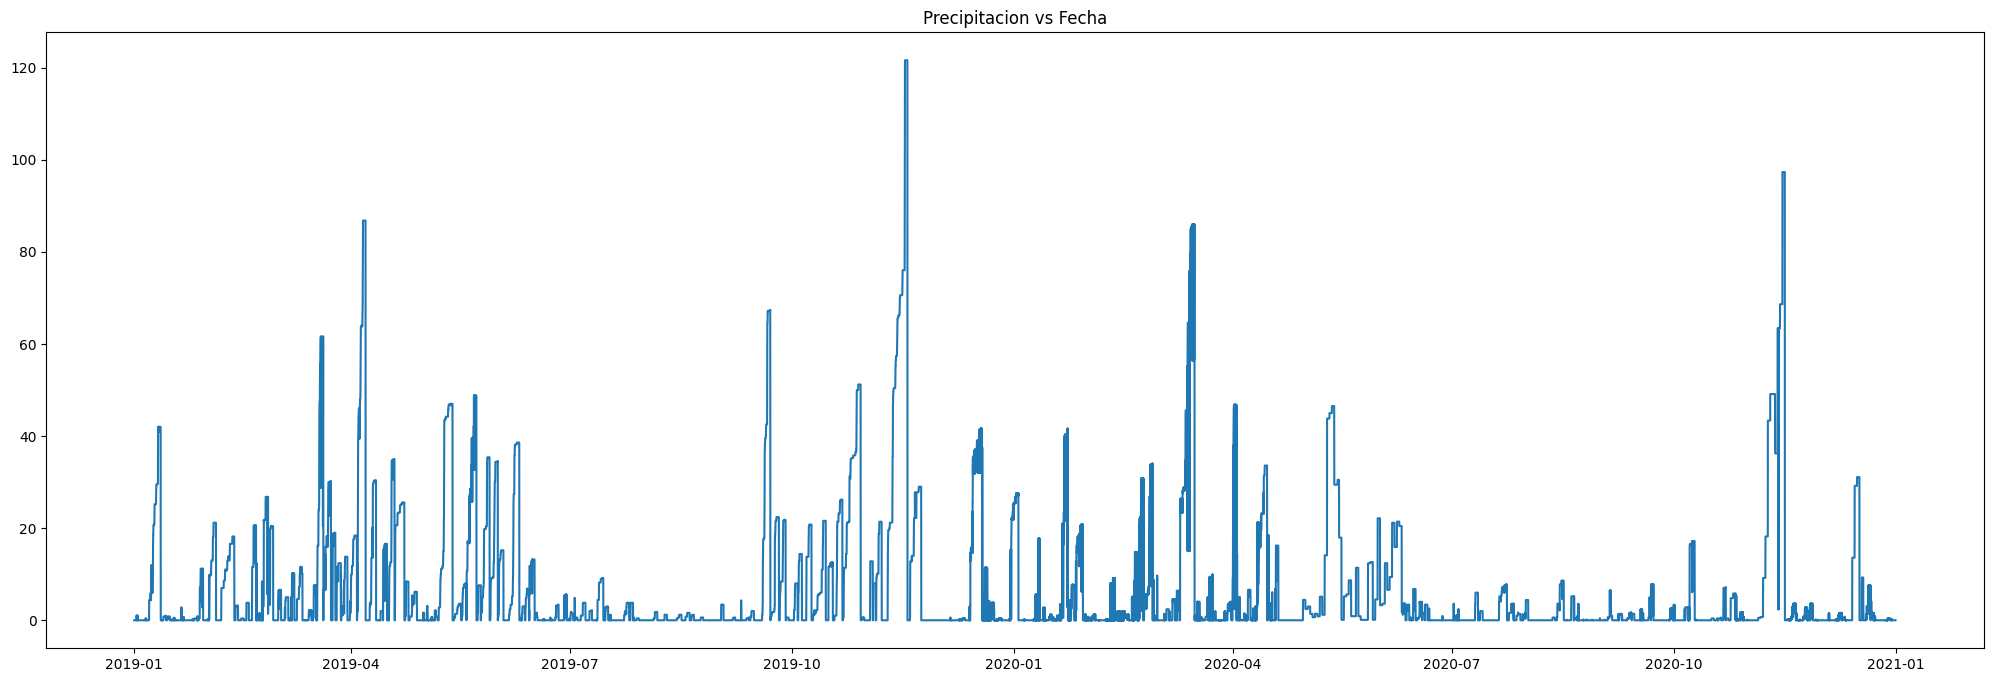

In [61]:
plt.figure(figsize=(25,8))
print(df.Estacion[0])
plt.plot(df.Fecha.sort_values(ascending=True), df["Precipitacion"])
plt.title("Precipitacion vs Fecha")
plt.show()

## **Implementacion de Modelo para Series de Tiempo**

In [62]:
#Dataframe procesado para la aplicacion del modelo
df

,Hora,Temperatura,Velocidad,Presion,Humedad,Precipitacion,Radiacion,year,month,day,Estacion,Fecha
0,00:01:35,19.61,4.02,599.32,66.0,0.0,0.0,2019,1,1,Estacion01,2019-01-01 00:01:35
1,00:06:36,19.61,3.13,599.27,67.0,0.0,0.0,2019,1,1,Estacion01,2019-01-01 00:06:36
2,00:11:37,19.67,3.58,599.27,67.0,0.0,0.0,2019,1,1,Estacion01,2019-01-01 00:11:37
3,00:16:35,19.56,2.68,599.22,66.0,0.0,0.0,2019,1,1,Estacion01,2019-01-01 00:16:35
4,00:21:38,19.44,3.58,599.22,67.0,0.0,0.0,2019,1,1,Estacion01,2019-01-01 00:21:38
...,...,...,...,...,...,...,...,...,...,...,...,...
206398,23:35:39,1.60,1.60,603.46,84.1,0.0,484.3,2020,12,31,Estacion01,2020-12-31 23:35:39
206399,23:40:39,-0.40,-0.40,603.46,82.1,0.0,472.3,2020,12,31,Estacion01,2020-12-31 23:40:39
206400,23:45:40,0.80,0.80,603.44,83.3,0.0,327.5,2020,12,31,Estacion01,2020-12-31 23:45:40
206401,23:50:53,1.60,1.60,603.39,84.1,0.0,442.7,2020,12,31,Estacion01,2020-12-31 23:50:53


In [63]:
tipos = df.Estacion.unique()

In [64]:
#Se pueden definir 
holidays = pd.DataFrame({
                'holiday': 'eventossignificativos', 
                'ds': pd.to_datetime(['2017-04-19','2011-04-13','2011-11-05']),
                'lower_window': 0,
                'upper_window': 1,
            })
holidays

,holiday,ds,lower_window,upper_window
0,eventossignificativos,2017-04-19,0,1
1,eventossignificativos,2011-04-13,0,1
2,eventossignificativos,2011-11-05,0,1


In [65]:
## Modelo Prophet Multivariado - 5 variables

In [66]:
def group(data, column_name, frec):

        """
        Esta funcion agrupa por serie de tiempo en dias para obtener la media los datos
        """
        data = data.groupby([pd.Grouper(key=column_name, freq=frec)]).mean() 
        data = data.reset_index()
        data[column_name] = pd.to_datetime(data[column_name]) 
        data[column_name] = data[column_name].sort_values(ascending=False)
        data = data.set_index(column_name)

        return data

In [67]:
def RMSE_score_prophet(y_true, y_pred):

                y1 = mean_squared_error(y_true[['y']].iloc[-7], y_pred[['yhat']].iloc[-14])
                y2 = mean_squared_error(y_true[['y']].iloc[-6], y_pred[['yhat']].iloc[-13])
                y3 = mean_squared_error(y_true[['y']].iloc[-5], y_pred[['yhat']].iloc[-12])
                y4 = mean_squared_error(y_true[['y']].iloc[-4], y_pred[['yhat']].iloc[-11])
                y5 = mean_squared_error(y_true[['y']].iloc[-3], y_pred[['yhat']].iloc[-10])
                y6 = mean_squared_error(y_true[['y']].iloc[-2], y_pred[['yhat']].iloc[-9])
                y7 = mean_squared_error(y_true[['y']].iloc[-1], y_pred[['yhat']].iloc[-8])

                mean = sqrt((y1 + y2 + y3 + y4 + y5 + y6 + y7)/7)
                return mean 

In [68]:
def MSE_score_prophet(y_true, y_pred):

                y1 = mean_squared_error(y_true[['y']].iloc[-7], y_pred[['yhat']].iloc[-14])
                y2 = mean_squared_error(y_true[['y']].iloc[-6], y_pred[['yhat']].iloc[-13])
                y3 = mean_squared_error(y_true[['y']].iloc[-5], y_pred[['yhat']].iloc[-12])
                y4 = mean_squared_error(y_true[['y']].iloc[-4], y_pred[['yhat']].iloc[-11])
                y5 = mean_squared_error(y_true[['y']].iloc[-3], y_pred[['yhat']].iloc[-10])
                y6 = mean_squared_error(y_true[['y']].iloc[-2], y_pred[['yhat']].iloc[-9])
                y7 = mean_squared_error(y_true[['y']].iloc[-1], y_pred[['yhat']].iloc[-8])

                mean = (y1 + y2 + y3 + y4 + y5 + y6 + y7)/7 
                return mean 

In [69]:
def MAE_score_prophet(y_true, y_pred):

                y1 = mean_absolute_error(y_true[['y']].iloc[-7], y_pred[['yhat']].iloc[-14])
                y2 = mean_absolute_error(y_true[['y']].iloc[-6], y_pred[['yhat']].iloc[-13])
                y3 = mean_absolute_error(y_true[['y']].iloc[-5], y_pred[['yhat']].iloc[-12])
                y4 = mean_absolute_error(y_true[['y']].iloc[-4], y_pred[['yhat']].iloc[-11])
                y5 = mean_absolute_error(y_true[['y']].iloc[-3], y_pred[['yhat']].iloc[-10])
                y6 = mean_absolute_error(y_true[['y']].iloc[-2], y_pred[['yhat']].iloc[-9])
                y7 = mean_absolute_error(y_true[['y']].iloc[-1], y_pred[['yhat']].iloc[-8])

                mean = (y1 + y2 + y3 + y4 + y5 + y6 + y7)/7 
                return mean 

## **Resultados**

Estacion : Estacion01
predichos train
            ds       yhat
0   2019-01-01 -12.574917
1   2019-01-02  14.692185
2   2019-01-03   4.809190
3   2019-01-04  13.483294
4   2019-01-05  -1.077665
..         ...        ...
719 2020-12-20   4.573544
720 2020-12-21   7.027552
721 2020-12-22   5.872057
722 2020-12-23   2.780932
723 2020-12-24   3.299777

[724 rows x 2 columns]


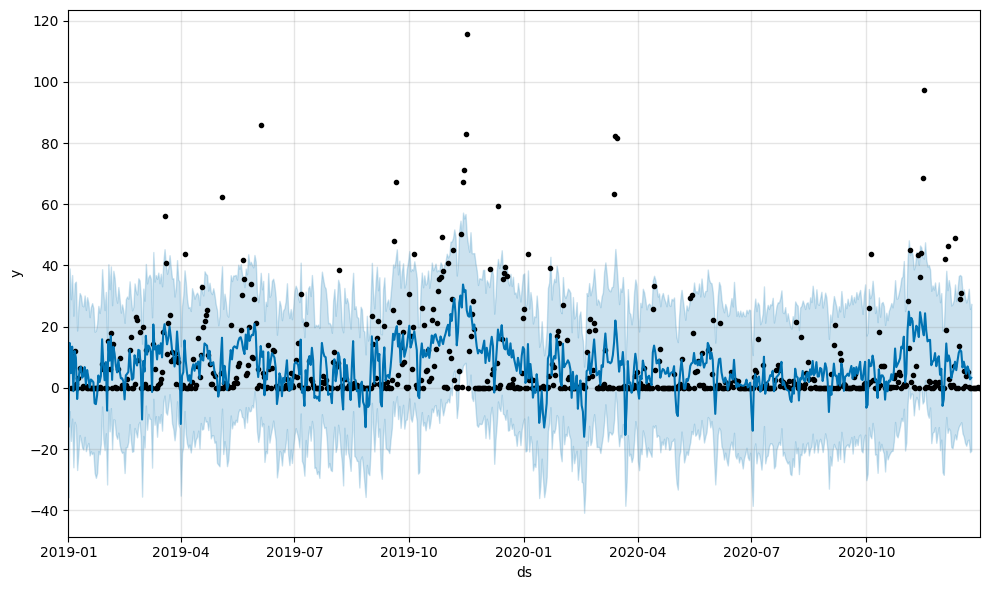

El error RMSE train =  12.11525180931025
El error MSE train =  146.77932640299528
El error MAE train =  7.79223468214637
predichos Test
           ds       yhat
0  2020-12-08   3.166675
1  2020-12-09   4.901163
2  2020-12-10   6.222139
3  2020-12-11   8.559315
4  2020-12-12   5.797534
5  2020-12-13   8.890281
6  2020-12-14  11.489844
7  2020-12-15  12.470549
8  2020-12-16  11.912071
9  2020-12-17   6.661674
10 2020-12-18   8.585667
11 2020-12-19   6.735015
12 2020-12-20   4.573544
13 2020-12-21   7.027552
14 2020-12-22   5.872057
15 2020-12-23   2.780932
16 2020-12-24   3.299777
17 2020-12-25   4.971162
18 2020-12-26   7.163203
19 2020-12-27   4.208514
20 2020-12-28   5.051459
21 2020-12-29   3.695801
22 2020-12-30  -0.180155
23 2020-12-31  -0.156559
24 2021-01-01   0.531851
25 2021-01-02   1.923407
26 2021-01-03  -1.631206
27 2021-01-04  -1.140347
28 2021-01-05  -1.101175
29 2021-01-06  -1.271024
30 2021-01-07  -2.231780
Test
            ds          y     Presion    Humedad
0   2019-0

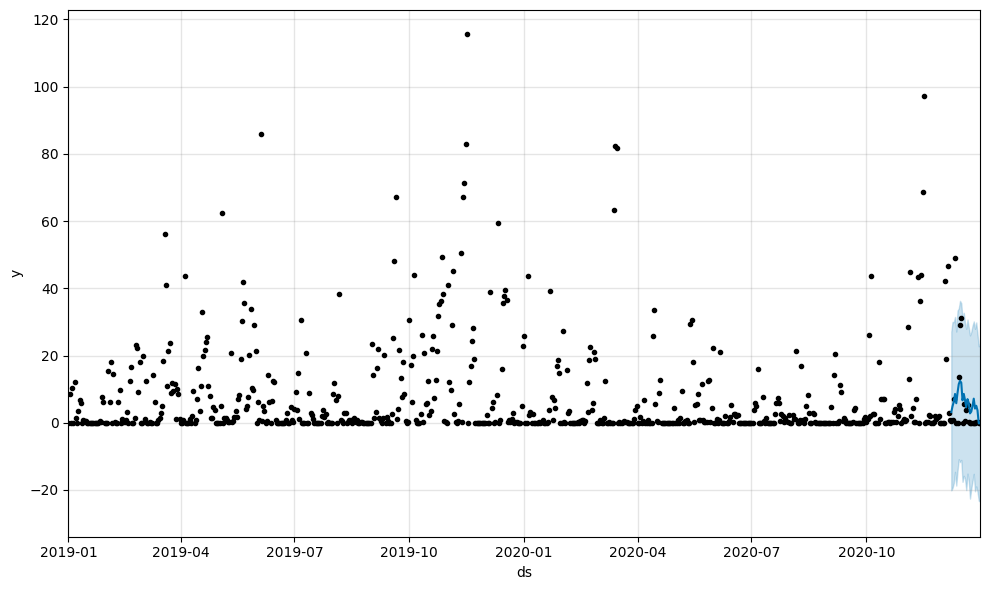

El error RMSE =  4.311906258763969
El error MSE =  18.59253558436789
El error MAE =  3.581315606707009




In [70]:
#Propeth Multivariable - 2 Variables

import datetime as datetime
guardar = []

for i in tipos:
    print("Estacion :", i)
    df_1 = df[df.Estacion == i] 
    df_1 = group(df_1,"Fecha", frec="1D")
    df_1["Estacion"] = i
    #Rellenamos los valores nulls con la media
    df_1 = df_1.fillna(df_1.mean()) 

    df2 = df_1[["Precipitacion",'Presion','Humedad']]  
    df2.reset_index(drop = False, inplace = True)
    df2 = df2.rename(columns={"Precipitacion":"y", "Fecha": "ds"})
    
    
    m = Prophet(interval_width=0.95, daily_seasonality=True, holidays = holidays) 
    m.add_regressor('Presion') 
    m.add_regressor('Humedad')
    m.fit(df2) 
    
    futur = m.make_future_dataframe(periods=7, freq="1D") 
    future_train = futur.iloc[:-14] 
    future  = futur.iloc[-31:]   
    
    future_train.reset_index(inplace = True, drop = True)
    future.reset_index(inplace = True, drop = True)
    
    future_train = pd.merge(future_train ,df2[['Presion', 'Humedad',"ds"]].iloc[:-7], how = "left", on = ['ds'])
    future_train = future_train.fillna(df_1.mean())
    
    
    future = pd.merge(future,df2[['Presion', 'Humedad',"ds"]].iloc[-24:], how = "left", on = ['ds'])
    future = future.fillna(df_1.mean()) #
    
    
    forecast_train = m.predict(future_train) 
    forecast = m.predict(future)
    
    #Fecha de Inicio para el plot
    y1=df.iloc[1][7]
    m1=df.iloc[1][8]
    d1=df.iloc[1][9]
    #Fecha de Fin para el plot
    x=len(df.Fecha)-1
    y2=int(df.Fecha[x].year)
    m2=int(df.Fecha[x].month)
    d2=int(df.Fecha[x].day)
    
    
    print("predichos train")
    print(forecast_train[['ds','yhat']])  
    m.plot(forecast_train)
    plt.xlim(datetime.datetime(y1,m1,d1), datetime.datetime(y2,m2,d2))  
    plt.show() 
    
    rmse_train = sqrt(mean_squared_error(df2[:-7].y.values, forecast_train.yhat.values)) 
    mse_train = mean_squared_error(df2[:-7].y.values, forecast_train.yhat.values)
    mae_train = mean_absolute_error(df2[:-7].y.values, forecast_train.yhat.values) 
    print("El error RMSE train = ", rmse_train)
    print("El error MSE train = ", mse_train)
    print("El error MAE train = ", mae_train)
    
    print("predichos Test") 
    print(forecast[['ds','yhat']])  
    print("Test")
    print(df2)  
    
    m.plot(forecast)
    #plt.xlim(datetime.datetime(2020,12,25), datetime.datetime(2021,1,6))     
    plt.xlim(datetime.datetime(y1,m1,d1), datetime.datetime(y2,m2,d2)) 
    plt.show() 

    rmse = RMSE_score_prophet(df2, forecast)
    mse = MSE_score_prophet(df2, forecast)
    mae = MAE_score_prophet(df2, forecast)
    print("El error RMSE = ", rmse)
    print("El error MSE = ", mse)
    print("El error MAE = ", mae)
    print("\n")
    
    forecast2 = forecast.copy()
    forecast2.rename(columns={'yhat':'y'},inplace = True) 
    frames = [df2, forecast2[['ds','y','Presion', 'Humedad']].iloc[-7:]] 
    final = pd.concat(frames).reset_index(drop = True)
    riesgo = final.y.tail(25).sum() 
    guardar.append([riesgo,i])
    

Estacion : Estacion01
predichos train
            ds       yhat
0   2019-01-01 -12.678012
1   2019-01-02  14.591318
2   2019-01-03   4.681956
3   2019-01-04  13.383816
4   2019-01-05  -1.188506
..         ...        ...
719 2020-12-20   4.445312
720 2020-12-21   6.891416
721 2020-12-22   6.227990
722 2020-12-23   3.142159
723 2020-12-24   3.769216

[724 rows x 2 columns]


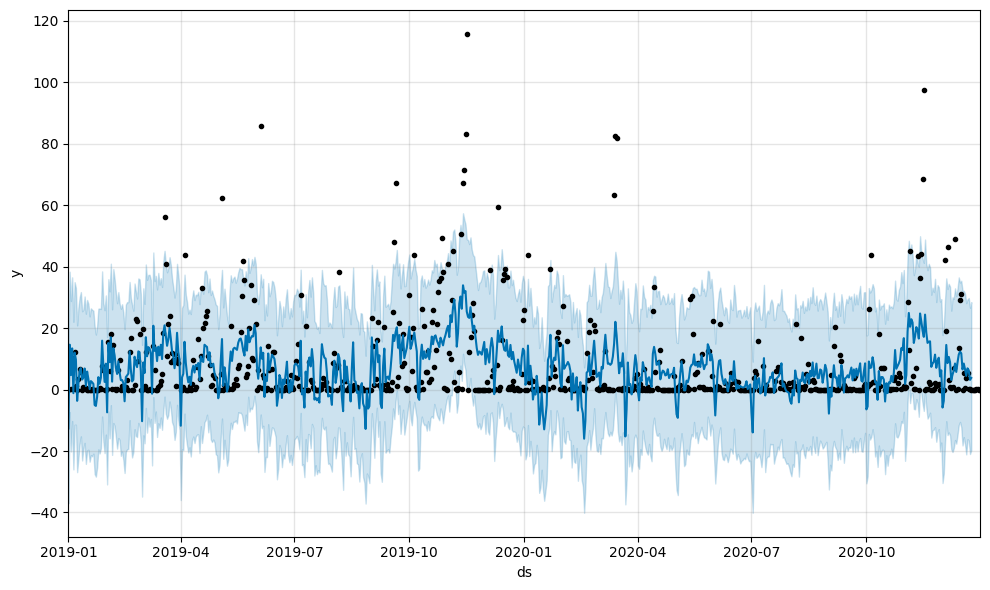

El error RMSE train =  12.113506508457926
El error MSE train =  146.7370399304525
El error MAE train =  7.787960290325312
predichos Test
           ds       yhat
0  2020-12-08   3.127291
1  2020-12-09   4.850299
2  2020-12-10   6.181650
3  2020-12-11   8.452439
4  2020-12-12   5.721571
5  2020-12-13   8.807595
6  2020-12-14  11.377167
7  2020-12-15  12.345736
8  2020-12-16  11.775145
9  2020-12-17   6.544357
10 2020-12-18   8.451346
11 2020-12-19   6.608768
12 2020-12-20   4.445312
13 2020-12-21   6.891416
14 2020-12-22   6.227990
15 2020-12-23   3.142159
16 2020-12-24   3.769216
17 2020-12-25   5.428600
18 2020-12-26   7.552569
19 2020-12-27   4.580996
20 2020-12-28   5.259366
21 2020-12-29   4.025698
22 2020-12-30   0.240613
23 2020-12-31   0.264292
24 2021-01-01   0.388619
25 2021-01-02   1.789151
26 2021-01-03  -1.768918
27 2021-01-04  -1.270317
28 2021-01-05  -1.227636
29 2021-01-06  -1.389345
30 2021-01-07  -2.343520
Test
            ds          y     Presion  Temperatura    Hume

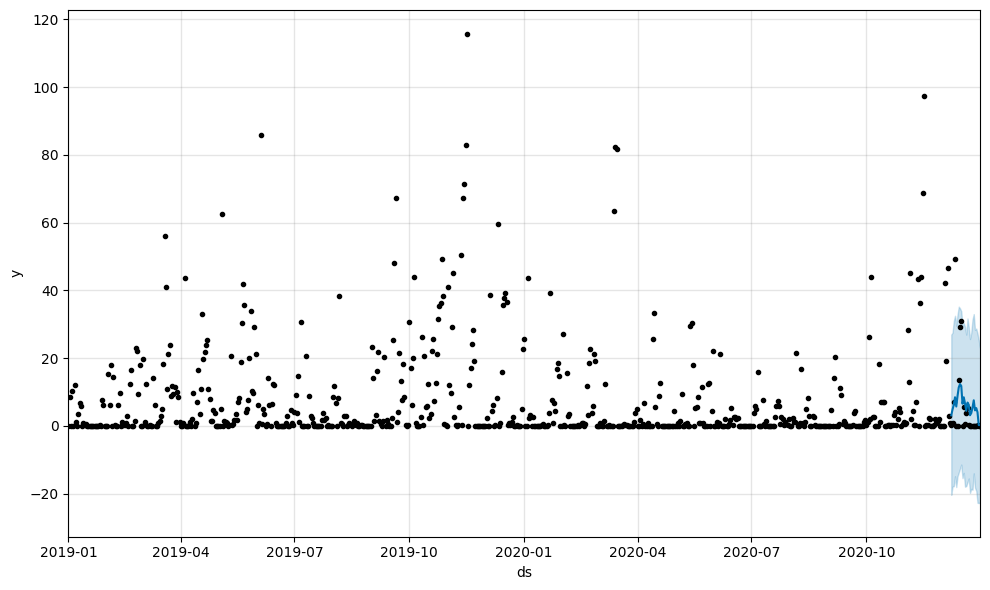

El error RMSE =  4.605163829330147
El error MSE =  21.207533894970705
El error MAE =  3.85584368301982




In [71]:
#Propeth Multivariable - 3 Variables

import datetime as datetime
guardar = []

for i in tipos:
    print("Estacion :", i)
    df_1 = df[df.Estacion == i] 
    df_1 = group(df_1,"Fecha", frec="1D")
    df_1["Estacion"] = i
    #Rellenamos los valores nulls con la media
    df_1 = df_1.fillna(df_1.mean()) 

    df2 = df_1[["Precipitacion",'Presion','Temperatura','Humedad']]  
    df2.reset_index(drop = False, inplace = True)
    df2 = df2.rename(columns={"Precipitacion":"y", "Fecha": "ds"})
    
    
    m = Prophet(interval_width=0.95, daily_seasonality=True, holidays = holidays) 
    m.add_regressor('Presion') 
    m.add_regressor('Temperatura')
    m.add_regressor('Humedad')
    m.fit(df2) 
    
    futur = m.make_future_dataframe(periods=7, freq="1D") 
    future_train = futur.iloc[:-14] 
    future  = futur.iloc[-31:]   
    
    future_train.reset_index(inplace = True, drop = True)
    future.reset_index(inplace = True, drop = True)
    
    future_train = pd.merge(future_train ,df2[['Presion','Temperatura','Humedad',"ds"]].iloc[:-7], how = "left", on = ['ds'])
    future_train = future_train.fillna(df_1.mean())
    
    
    future = pd.merge(future,df2[['Presion','Temperatura','Humedad',"ds"]].iloc[-24:], how = "left", on = ['ds'])
    future = future.fillna(df_1.mean()) #
    
    
    forecast_train = m.predict(future_train) 
    forecast = m.predict(future)
    
    #Fecha de Inicio para el plot
    y1=df.iloc[1][7]
    m1=df.iloc[1][8]
    d1=df.iloc[1][9]
    #Fecha de Fin para el plot
    x=len(df.Fecha)-1
    y2=int(df.Fecha[x].year)
    m2=int(df.Fecha[x].month)
    d2=int(df.Fecha[x].day)
    
    
    print("predichos train")
    print(forecast_train[['ds','yhat']])  
    m.plot(forecast_train)
    plt.xlim(datetime.datetime(y1,m1,d1), datetime.datetime(y2,m2,d2))  
    plt.show() 
    
    rmse_train = sqrt(mean_squared_error(df2[:-7].y.values, forecast_train.yhat.values)) 
    mse_train = mean_squared_error(df2[:-7].y.values, forecast_train.yhat.values)
    mae_train = mean_absolute_error(df2[:-7].y.values, forecast_train.yhat.values) 
    print("El error RMSE train = ", rmse_train)
    print("El error MSE train = ", mse_train)
    print("El error MAE train = ", mae_train)
    
    print("predichos Test") 
    print(forecast[['ds','yhat']])  
    print("Test")
    print(df2)  
    
    m.plot(forecast)
    #plt.xlim(datetime.datetime(2020,12,25), datetime.datetime(2021,1,6))     
    plt.xlim(datetime.datetime(y1,m1,d1), datetime.datetime(y2,m2,d2)) 
    plt.show() 

    rmse = RMSE_score_prophet(df2, forecast)
    mse = MSE_score_prophet(df2, forecast)
    mae = MAE_score_prophet(df2, forecast)
    print("El error RMSE = ", rmse)
    print("El error MSE = ", mse)
    print("El error MAE = ", mae)
    print("\n")
    
    forecast2 = forecast.copy()
    forecast2.rename(columns={'yhat':'y'},inplace = True) 
    frames = [df2, forecast2[['ds','y','Presion','Temperatura','Humedad']].iloc[-7:]] 
    final = pd.concat(frames).reset_index(drop = True)
    riesgo = final.y.tail(25).sum() 
    guardar.append([riesgo,i])
    

Estacion : Estacion01
predichos train
            ds       yhat
0   2019-01-01 -12.865730
1   2019-01-02  13.563594
2   2019-01-03   3.825304
3   2019-01-04  12.423355
4   2019-01-05  -1.434263
..         ...        ...
719 2020-12-20   3.110485
720 2020-12-21   6.023208
721 2020-12-22   7.375483
722 2020-12-23   4.822682
723 2020-12-24   5.197952

[724 rows x 2 columns]


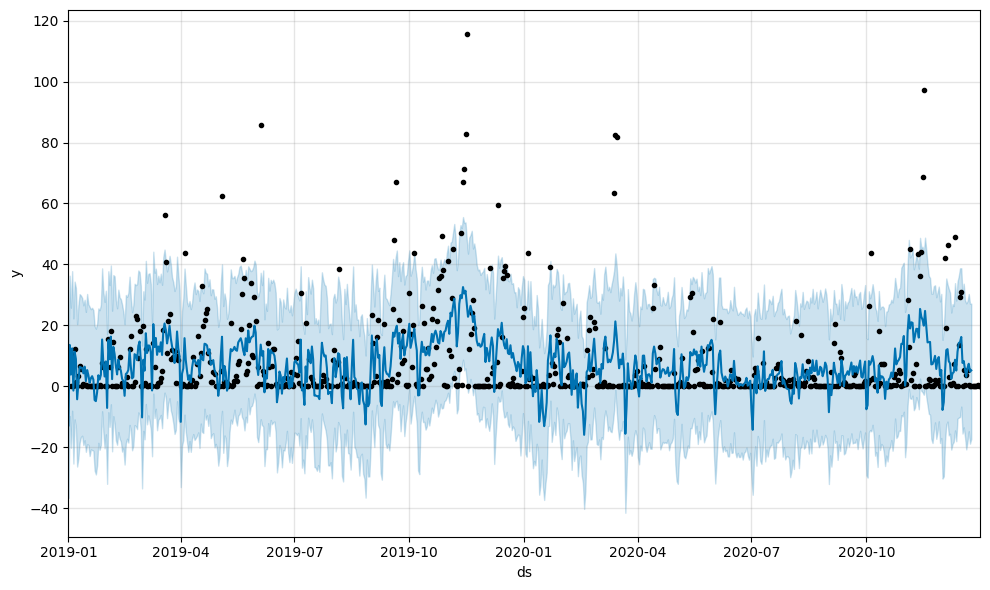

El error RMSE train =  12.059995798732134
El error MSE train =  145.4434986654367
El error MAE train =  7.768753744253515
predichos Test
           ds       yhat
0  2020-12-08   2.407965
1  2020-12-09   4.195984
2  2020-12-10   4.643029
3  2020-12-11   8.693321
4  2020-12-12   5.139528
5  2020-12-13  11.311090
6  2020-12-14  14.217760
7  2020-12-15  14.445542
8  2020-12-16  16.167476
9  2020-12-17   7.640460
10 2020-12-18   8.249537
11 2020-12-19   5.488402
12 2020-12-20   3.110485
13 2020-12-21   6.023208
14 2020-12-22   7.375483
15 2020-12-23   4.822682
16 2020-12-24   5.197952
17 2020-12-25   7.074896
18 2020-12-26   8.350294
19 2020-12-27   5.787277
20 2020-12-28   6.016457
21 2020-12-29   5.641478
22 2020-12-30   2.047818
23 2020-12-31   0.878827
24 2021-01-01  -1.723401
25 2021-01-02  -0.321858
26 2021-01-03  -3.765464
27 2021-01-04  -3.199497
28 2021-01-05  -3.000383
29 2021-01-06  -3.283604
30 2021-01-07  -4.164702
Test
            ds          y     Presion  Temperatura    Hume

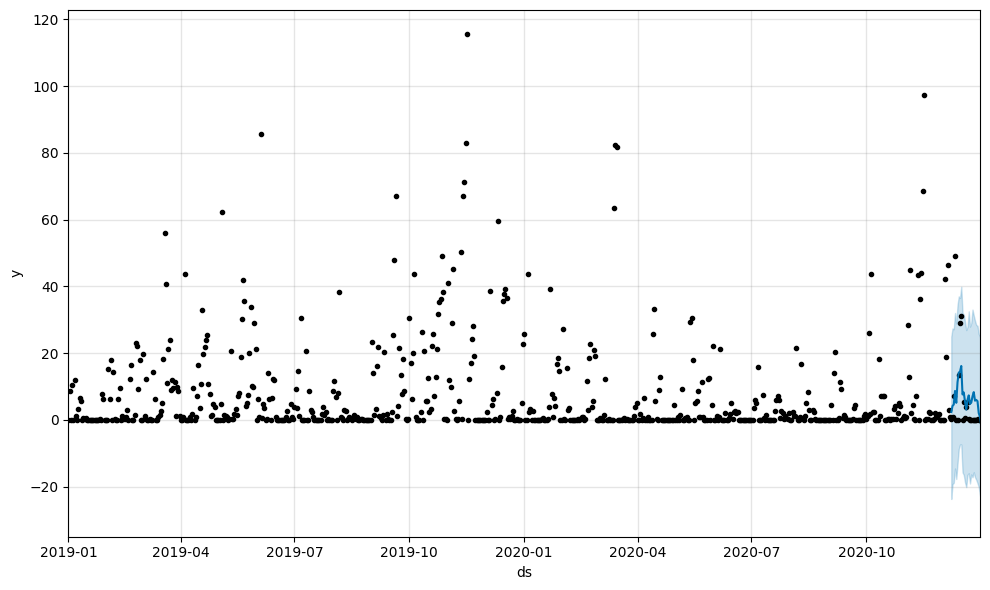

El error RMSE =  5.634187454338057
El error MSE =  31.74406827062035
El error MAE =  5.062259913698588




In [72]:
#Propeth Multivariable - 4 Variables

import datetime as datetime
guardar = []

for i in tipos:
    print("Estacion :", i)
    df_1 = df[df.Estacion == i] 
    df_1 = group(df_1,"Fecha", frec="1D")
    df_1["Estacion"] = i
    #Rellenamos los valores nulls con la media
    df_1 = df_1.fillna(df_1.mean()) 

    df2 = df_1[["Precipitacion",'Presion','Temperatura','Humedad','Radiacion']]  
    df2.reset_index(drop = False, inplace = True)
    df2 = df2.rename(columns={"Precipitacion":"y", "Fecha": "ds"})
    
    
    m = Prophet(interval_width=0.95, daily_seasonality=True, holidays = holidays) 
    m.add_regressor('Presion') 
    m.add_regressor('Temperatura')
    m.add_regressor('Humedad')
    m.add_regressor('Radiacion')
    m.fit(df2) 
    
    futur = m.make_future_dataframe(periods=7, freq="1D") 
    future_train = futur.iloc[:-14] 
    future  = futur.iloc[-31:]   
    
    future_train.reset_index(inplace = True, drop = True)
    future.reset_index(inplace = True, drop = True)
    
    future_train = pd.merge(future_train ,df2[['Presion','Temperatura','Humedad','Radiacion',"ds"]].iloc[:-7], how = "left", on = ['ds'])
    future_train = future_train.fillna(df_1.mean())
    
    
    future = pd.merge(future,df2[['Presion','Temperatura','Humedad','Radiacion',"ds"]].iloc[-24:], how = "left", on = ['ds'])
    future = future.fillna(df_1.mean()) #
    
    
    forecast_train = m.predict(future_train) 
    forecast = m.predict(future)
    
    #Fecha de Inicio para el plot
    y1=df.iloc[1][7]
    m1=df.iloc[1][8]
    d1=df.iloc[1][9]
    #Fecha de Fin para el plot
    x=len(df.Fecha)-1
    y2=int(df.Fecha[x].year)
    m2=int(df.Fecha[x].month)
    d2=int(df.Fecha[x].day)
    
    
    print("predichos train")
    print(forecast_train[['ds','yhat']])  
    m.plot(forecast_train)
    plt.xlim(datetime.datetime(y1,m1,d1), datetime.datetime(y2,m2,d2))  
    plt.show() 
    
    rmse_train = sqrt(mean_squared_error(df2[:-7].y.values, forecast_train.yhat.values)) 
    mse_train = mean_squared_error(df2[:-7].y.values, forecast_train.yhat.values)
    mae_train = mean_absolute_error(df2[:-7].y.values, forecast_train.yhat.values) 
    print("El error RMSE train = ", rmse_train)
    print("El error MSE train = ", mse_train)
    print("El error MAE train = ", mae_train)
    
    print("predichos Test") 
    print(forecast[['ds','yhat']])  
    print("Test")
    print(df2)  
    
    m.plot(forecast)
    #plt.xlim(datetime.datetime(2020,12,25), datetime.datetime(2021,1,6))     
    plt.xlim(datetime.datetime(y1,m1,d1), datetime.datetime(y2,m2,d2)) 
    plt.show() 

    rmse = RMSE_score_prophet(df2, forecast)
    mse = MSE_score_prophet(df2, forecast)
    mae = MAE_score_prophet(df2, forecast)
    print("El error RMSE = ", rmse)
    print("El error MSE = ", mse)
    print("El error MAE = ", mae)
    print("\n")
    
    forecast2 = forecast.copy()
    forecast2.rename(columns={'yhat':'y'},inplace = True) 
    frames = [df2, forecast2[['ds','y','Presion','Temperatura','Humedad','Radiacion']].iloc[-7:]] 
    final = pd.concat(frames).reset_index(drop = True)
    riesgo = final.y.tail(25).sum() 
    guardar.append([riesgo,i])
    

Estacion : Estacion01
predichos train
            ds       yhat
0   2019-01-01 -11.320577
1   2019-01-02  11.930289
2   2019-01-03   2.764962
3   2019-01-04  11.344245
4   2019-01-05   1.305940
..         ...        ...
719 2020-12-20   2.370145
720 2020-12-21   6.774024
721 2020-12-22   6.355762
722 2020-12-23   3.637882
723 2020-12-24   4.142127

[724 rows x 2 columns]


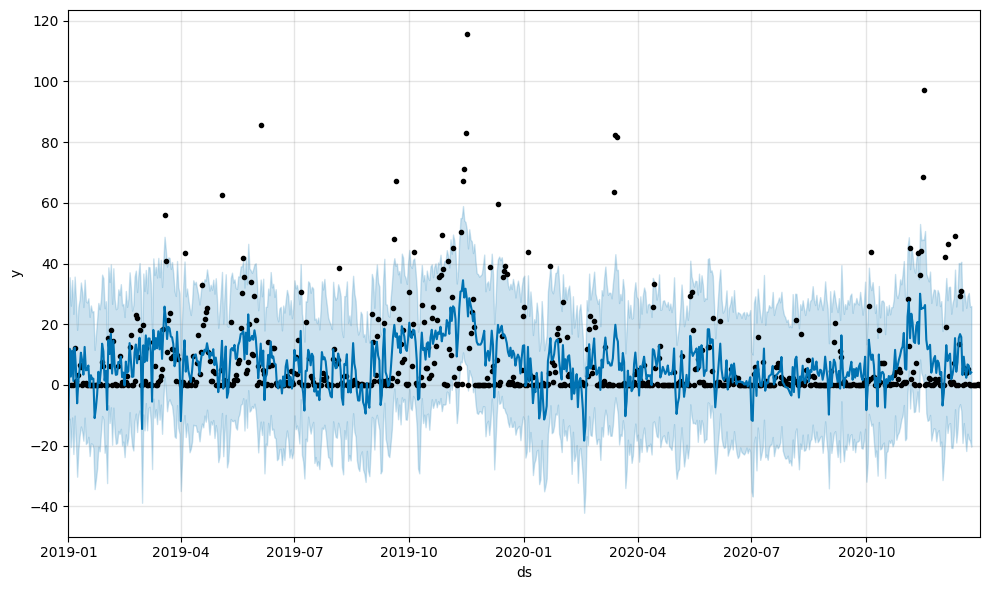

El error RMSE train =  11.877106477170216
El error MSE train =  141.0656582700387
El error MAE train =  7.653670532636891
predichos Test
           ds       yhat
0  2020-12-08   1.874831
1  2020-12-09   3.374307
2  2020-12-10   5.987927
3  2020-12-11  15.439688
4  2020-12-12   4.357140
5  2020-12-13   7.509729
6  2020-12-14  15.386717
7  2020-12-15  16.759697
8  2020-12-16  15.781018
9  2020-12-17   3.250077
10 2020-12-18   9.310290
11 2020-12-19   5.191185
12 2020-12-20   2.370145
13 2020-12-21   6.774024
14 2020-12-22   6.355762
15 2020-12-23   3.637882
16 2020-12-24   4.142127
17 2020-12-25   7.038626
18 2020-12-26   7.437543
19 2020-12-27   4.124273
20 2020-12-28   5.541060
21 2020-12-29   3.996581
22 2020-12-30   1.741223
23 2020-12-31  -2.335395
24 2021-01-01   0.191894
25 2021-01-02   1.877458
26 2021-01-03  -1.598105
27 2021-01-04  -1.216664
28 2021-01-05  -1.227509
29 2021-01-06  -1.074960
30 2021-01-07  -2.106379
Test
            ds          y     Presion  Temperatura    Hume

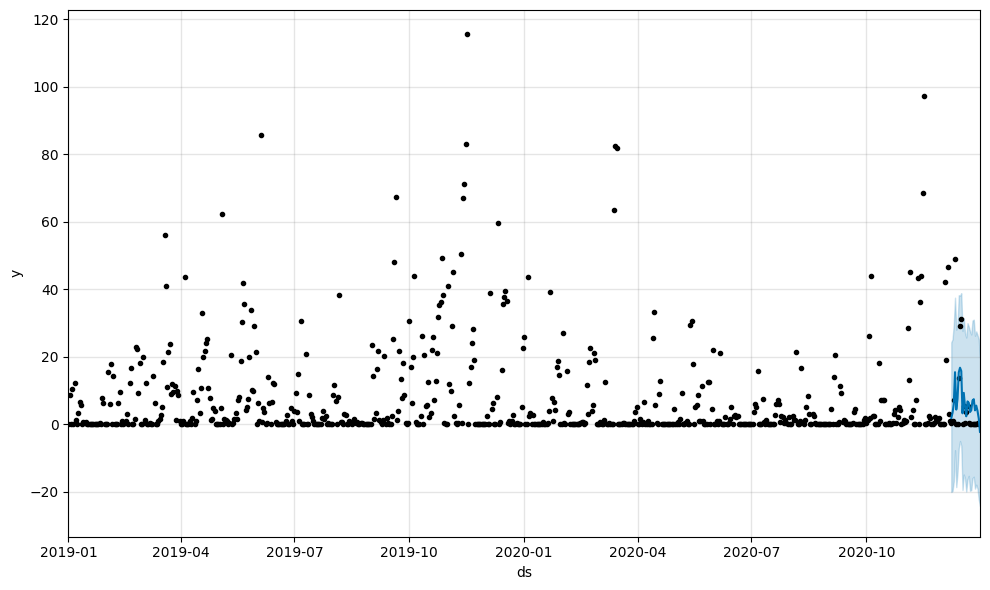

El error RMSE =  4.984959621027101
El error MSE =  24.849822423270655
El error MAE =  4.550496267746943




In [73]:
#Propeth Multivariable - 5 Variables

import datetime as datetime
guardar = []

for i in tipos:
    print("Estacion :", i)
    df_1 = df[df.Estacion == i] 
    df_1 = group(df_1,"Fecha", frec="1D")
    df_1["Estacion"] = i
    #Rellenamos los valores nulls con la media
    df_1 = df_1.fillna(df_1.mean()) 

    df2 = df_1[["Precipitacion",'Presion','Temperatura','Humedad','Radiacion','Velocidad']]  
    df2.reset_index(drop = False, inplace = True)
    df2 = df2.rename(columns={"Precipitacion":"y", "Fecha": "ds"})
    
    
    m = Prophet(interval_width=0.95, daily_seasonality=True, holidays = holidays) 
    m.add_regressor('Presion') 
    m.add_regressor('Temperatura')
    m.add_regressor('Humedad')
    m.add_regressor('Radiacion')
    m.add_regressor('Velocidad')
    m.fit(df2) 
    
    futur = m.make_future_dataframe(periods=7, freq="1D") 
    future_train = futur.iloc[:-14] 
    future  = futur.iloc[-31:]   
    
    future_train.reset_index(inplace = True, drop = True)
    future.reset_index(inplace = True, drop = True)
    
    future_train = pd.merge(future_train ,df2[['Presion','Temperatura','Humedad','Radiacion','Velocidad',"ds"]].iloc[:-7], how = "left", on = ['ds'])
    future_train = future_train.fillna(df_1.mean())
    
    
    future = pd.merge(future,df2[['Presion','Temperatura','Humedad','Radiacion','Velocidad',"ds"]].iloc[-24:], how = "left", on = ['ds'])
    future = future.fillna(df_1.mean()) #
    
    
    forecast_train = m.predict(future_train) 
    forecast = m.predict(future)
    
    #Fecha de Inicio para el plot
    y1=df.iloc[1][7]
    m1=df.iloc[1][8]
    d1=df.iloc[1][9]
    #Fecha de Fin para el plot
    x=len(df.Fecha)-1
    y2=int(df.Fecha[x].year)
    m2=int(df.Fecha[x].month)
    d2=int(df.Fecha[x].day)
    
    
    print("predichos train")
    print(forecast_train[['ds','yhat']])  
    m.plot(forecast_train)
    plt.xlim(datetime.datetime(y1,m1,d1), datetime.datetime(y2,m2,d2))  
    plt.show() 
    
    rmse_train = sqrt(mean_squared_error(df2[:-7].y.values, forecast_train.yhat.values)) 
    mse_train = mean_squared_error(df2[:-7].y.values, forecast_train.yhat.values)
    mae_train = mean_absolute_error(df2[:-7].y.values, forecast_train.yhat.values) 
    print("El error RMSE train = ", rmse_train)
    print("El error MSE train = ", mse_train)
    print("El error MAE train = ", mae_train)
    
    print("predichos Test") 
    print(forecast[['ds','yhat']])  
    print("Test")
    print(df2)  
    
    m.plot(forecast)
    #plt.xlim(datetime.datetime(2020,12,25), datetime.datetime(2021,1,6))     
    plt.xlim(datetime.datetime(y1,m1,d1), datetime.datetime(y2,m2,d2)) 
    plt.show() 

    rmse = RMSE_score_prophet(df2, forecast)
    mse = MSE_score_prophet(df2, forecast)
    mae = MAE_score_prophet(df2, forecast)
    print("El error RMSE = ", rmse)
    print("El error MSE = ", mse)
    print("El error MAE = ", mae)
    print("\n")
    
    forecast2 = forecast.copy()
    forecast2.rename(columns={'yhat':'y'},inplace = True) 
    frames = [df2, forecast2[['ds','y','Presion','Temperatura','Humedad','Radiacion','Velocidad']].iloc[-7:]] 
    final = pd.concat(frames).reset_index(drop = True)
    riesgo = final.y.tail(25).sum() 
    guardar.append([riesgo,i])
    

## **Codigo para Alertas de Precipitaciones**

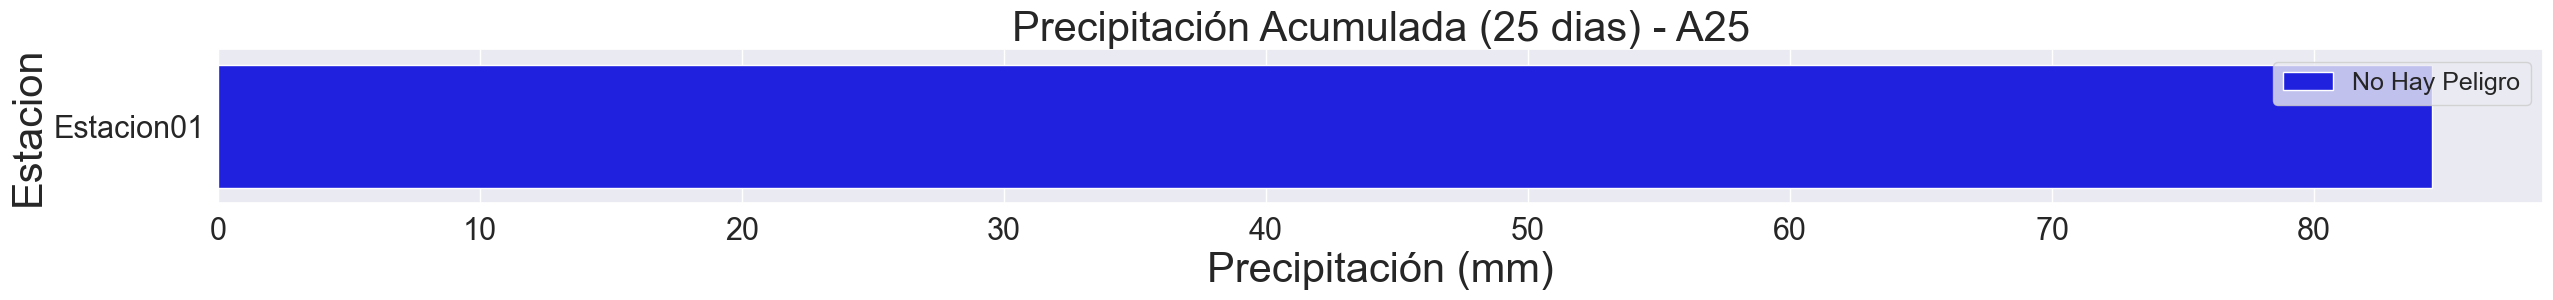

In [74]:
table = pd.DataFrame(guardar, )   
table.rename(columns={0:'Precipitacion acumulada', 1:'Estacion'}, inplace=True)   
table['Riesgo'] = np.NaN 
table.sort_values(by = 'Precipitacion acumulada', inplace=True)
table.reset_index(drop=True, inplace=True) 

for i in range(len(table)): 
    if table['Precipitacion acumulada'][i] < 200: 
        table['Riesgo'].iloc[i] = "No Hay Peligro" 

    if (table['Precipitacion acumulada'][i]  >= 200) & (table['Precipitacion acumulada'][i] < 300):  
        table['Riesgo'].iloc[i] = "Alerta Amarilla" 

    elif (table['Precipitacion acumulada'][i] < 400) & (table['Precipitacion acumulada'][i] >= 300):
        table['Riesgo'].iloc[i] = "Alerta Naranja"

    elif table['Precipitacion acumulada'][i] >=400:   
        table['Riesgo'].iloc[i] = "Alerta Roja" 

plt.figure(figsize=(30,2))  
sns.set(font_scale = 2)

palette = {'No Hay Peligro':'blue', 'Alerta Amarilla': 'yellow', 'Alerta Naranja': 'orange', 'Alerta Roja': 'red'}        

sns.barplot(x = 'Precipitacion acumulada', y = table.Estacion, data = table, hue = 'Riesgo', palette = palette,dodge=False )      

plt.title('Precipitación Acumulada (25 dias) - A25', fontsize=30)      
plt.legend(['Alerta Roja'], prop={'size': 13})  
plt.xlabel('Precipitación (mm)', fontsize = 30)    
plt.ylabel("Estacion",fontsize = 30)   
plt.legend(loc = 1,prop={'size': 18}) 
#ax.set_xlim(1,50)
plt.show()  

In [75]:
import smtplib 
from email.message import EmailMessage 

if table['Precipitacion acumulada'][0]>=400: 
    email_subject = "Alerta Roja - Precipitacion mayor a 400mm en estacion "+table['Estacion'][0] 
elif table['Precipitacion acumulada'][0]>=300 and table['Precipitacion acumulada'][0]<400:
    email_subject = "Alerta Naranja- Precipitacion mayor a 300mm en estacion "+table['Estacion'][0]
elif table['Precipitacion acumulada'][0]>=200 and table['Precipitacion acumulada'][0]<300:
    email_subject = "Alerta Amarilla- Precipitacion mayor a 200mm en estacion "+table['Estacion'][0]
elif table['Precipitacion acumulada'][0]<200:
    email_subject = "Precipitacion menor a 200mm en estacion "+table['Estacion'][0] +" sin riesgos"

sender_email_address = "mallccacocordova@gmail.com" 
receiver_email_address = "mallccacocordova@address.com" 
email_smtp = "smtp.gmail.com" 
email_password = "fsahxnlclevjwmus"

# Create an email message object 
message = EmailMessage() 

# Configure email headers 
message['Subject'] = email_subject 
message['From'] = sender_email_address 
message['To'] = receiver_email_address 

# Set email body text 
message.set_content(email_subject) 

# Set smtp server and port 
server = smtplib.SMTP(email_smtp, '587') 

# Identify this client to the SMTP server 
server.ehlo() 

# Secure the SMTP connection 
server.starttls() 

# Login to email account 
server.login(sender_email_address, email_password) 

# Send email 
server.send_message(message) 

# Close connection to server 
server.quit()

(221,
 b'2.0.0 closing connection lf12-20020a05687c348c00b001c4f3c0f8casm5759613oac.32 - gsmtp')

## **Funcion para analisis de Dataset Final**

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import kpss
from scipy import signal

In [77]:
guardar = []
guardar1 = []
guardar11 = []
guardar2 = []
guardar3 = []
guardar4 = []
guardar5 = []
guardar6 = []
tend_estacional = []


 ACF Residuo Recurrencia 



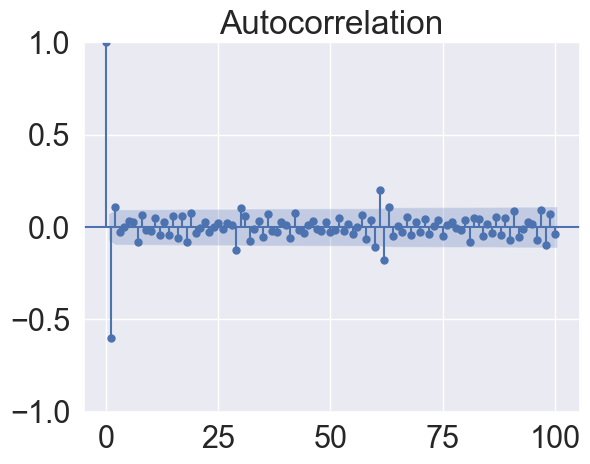

<Figure size 2500x800 with 0 Axes>

Los valores de ACF estan por encima de su umbral en un 8.0 %
Esto es un indicio de que la serie de tiempo es recurrente en 8 lag, lag = 100 



In [78]:
# ---------------------------------------- ACF residuo -----------------------------------------------------------------------------------
# Analisis para el ACF con Fecha-Precipitacion

print('\n ACF Residuo Recurrencia \n')
try:
    descomp = seasonal_decompose(df_1["Precipitacion"], model='additive', period=2)
    residuo = descomp.resid.dropna()
    plot_acf(residuo, lags=100)
    plt.figure(figsize=(25,8))
    plt.show()

    # calcular la ACF hasta un retraso máximo de 100
    lags = 100
    acf_vals, confint = acf(residuo, nlags=lags, alpha=0.01)

except:
    descomp = seasonal_decompose(df_1["Precipitacion"], model='additive', period=1)
    residuo = descomp.resid.dropna()
    plot_acf(residuo, lags=1)
    plt.figure(figsize=(25,8))
    plt.show()

    # calcular la ACF hasta un retraso máximo de 10
    lags = 1
    acf_vals, confint = acf(residuo, nlags=lags, alpha=0.01)

# guardar los valores de la ACF en un dataframe
df_acf_r = pd.DataFrame({'Lag': range(len(acf_vals)),
                    'ACF': acf_vals,
                    'Lower CI': confint[:, 0],
                    'Upper CI': confint[:, 1]})
df_acf_r = df_acf_r[df_acf_r['Lag'] > 0].reset_index(drop = True)
#El umbral 0.9 se adecuo deacuerdo a la necesidad. En una distribucion normal el valor es 1.96
# Es decir El valor crítico para un nivel de confianza del 95% es 1.96
umbral = 0.9 * np.sqrt(abs(confint[1:, 0]) * abs(confint[1:, 1]))
df_acf_r['Umbral superior'] = umbral
df_acf_r['Umbral inferior'] = -umbral
count = []
count_2 = []
for j in range(len(df_acf_r)):
    if df_acf_r['ACF'][j] < 0:
        if  df_acf_r['ACF'][j] < df_acf_r['Umbral inferior'][j]:
            count.append(j+1)
    if df_acf_r['ACF'][j] > 0:
        if  df_acf_r['ACF'][j] > df_acf_r['Umbral superior'][j]:
            count_2.append(j+1)
cuentas = len(count) + len(count_2)
umbrall = round((cuentas/len(df_acf_r))*100,2)

#print(count)
if cuentas >=1:
    print(f'Los valores de ACF estan por encima de su umbral en un {umbrall} %')
    print(f"Esto es un indicio de que la serie de tiempo es recurrente en {cuentas} lag, lag = {lags} \n")

    guardar1.append([i, 1])


else:
    print(f'Los valores de ACF estan por debajo de su umbral en un {umbrall} %')
    print(f"Esto es un indicio de que la serie de tiempo es NO recurrente en {cuentas} lag, lag = {lags} \n")

    guardar1.append([i,0])

ACF Tendencia Recurrencia 



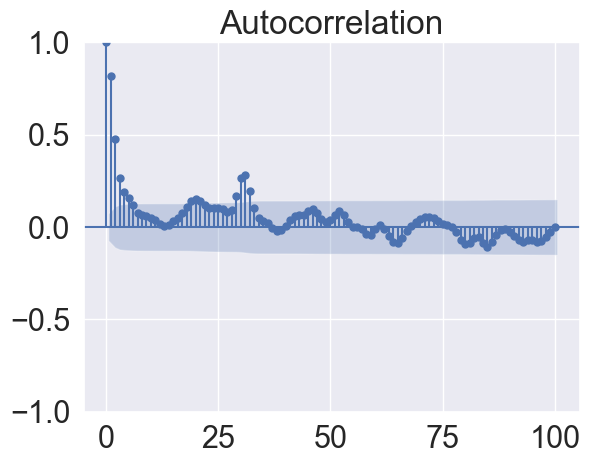

Los valores de ACF estan por encima de su umbral en un 54.0 %
Esto es un indicio de que la serie de tiempo es recurrente en 54 lag, lag = 100 



In [79]:
# --------------------------------------------- ACF tendencia ---------------------------------------------------------------------
# Analisis para el ACF con Fecha-Precipitacion

print('ACF Tendencia Recurrencia \n')
try:
    descomp = seasonal_decompose(df_1["Precipitacion"], model='additive', period=2)   
    tendencia = descomp.trend.dropna()
    plot_acf(tendencia, lags=100)
    plt.show()

    # calcular la ACF hasta un retraso máximo de 100
    lags = 100
    acf_vals, confint = acf(tendencia, nlags=lags, alpha=0.01)

except:
    descomp = seasonal_decompose(df_1["Precipitacion"], model='additive', period=1)
    tendencia = descomp.trend.dropna()
    plot_acf(tendencia, lags=1)
    plt.show()

    # calcular la ACF hasta un retraso máximo de 100
    lags = 1
    acf_vals, confint = acf(tendencia, nlags=lags, alpha=0.01)

# guardar los valores de la ACF en un dataframe
df_acf_t = pd.DataFrame({'Lag': range(len(acf_vals)),
                    'ACF': acf_vals,
                    'Lower CI': confint[:, 0],
                    'Upper CI': confint[:, 1]})
df_acf_t = df_acf_t[df_acf_t['Lag'] > 0].reset_index(drop = True)
#El umbral 0.9 se adecuo deacuerdo a la necesidad. En una distribucion normal el valor es 1.96
# Es decir El valor crítico para un nivel de confianza del 95% es 1.96
umbral = 0.3 * np.sqrt(abs(confint[1:, 0]) * abs(confint[1:, 1]))
df_acf_t['Umbral superior'] = umbral
df_acf_t['Umbral inferior'] = -umbral
count1 = []
count_22 = []
count_3 = []
count_4 = []


for j in range(len(df_acf_t)):
    if df_acf_t['ACF'][j] < 0:
        if  df_acf_t['ACF'][j] < df_acf_t['Umbral inferior'][j]:
            count1.append(j+1)
            count_3.append([df_acf_t['Lag'][j],df_acf_t['ACF'][j]])
    if df_acf_t['ACF'][j] > 0:
        if  df_acf_t['ACF'][j] > df_acf_t['Umbral superior'][j]:
            count_22.append(j+1)
            count_4.append([df_acf_t['Lag'][j],df_acf_t['ACF'][j]])

cuentas2 = len(count1) + len(count_22)
umbrall2 = round((cuentas2/len(df_acf_t))*100,2)

if cuentas2 >= 1:
    print(f'Los valores de ACF estan por encima de su umbral en un {umbrall2} %')
    print(f"Esto es un indicio de que la serie de tiempo es recurrente en {cuentas2} lag, lag = {lags} \n")
    guardar11.append([i, 1])

else:
    print(f'Los valores de ACF estan por debajo de su umbral en un {umbrall2} %')
    print(f"Esto es un indicio de que la serie de tiempo es NO recurrente en {cuentas2} lag, lag = {lags} \n")
    guardar11.append([i,0])

Analisis estacionalidad a partir de los valores insignificativos de la grafica ACF 


 0.0279340209947096 

No se observa un patrón senosoidal en los valores no significativos. 



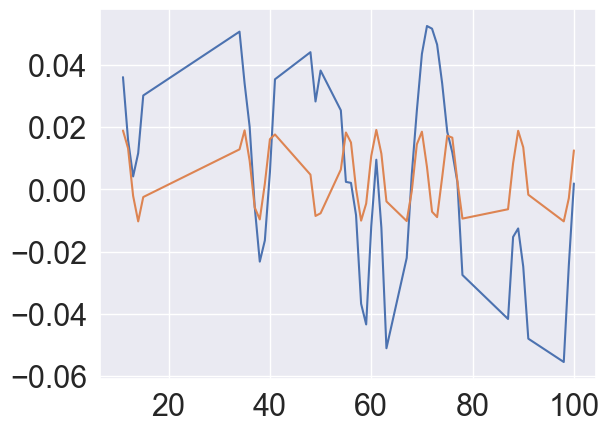

In [80]:
#-------------- Analisis estacionalidad a partir de los valores insignificativos de la grafica ACF -------------------------------
# Analisis para el ACF con Fecha-Precipitacion

print("Analisis estacionalidad a partir de los valores insignificativos de la grafica ACF \n")
if (len(count_3)!=0) and (len(count_4)!=0) :
    sign = pd.concat([pd.DataFrame(count_3).rename(columns={0:'Lag', 1:'ACF'}),pd.DataFrame(count_4).rename(columns={0:'Lag', 1:'ACF'}) ]).sort_values(by = 'Lag', ascending=True)
    df_acf2 = df_acf_t.copy()
    df_acf2 = df_acf2.loc[~df_acf2['Lag'].isin(sign['Lag'])]

    valores = np.array(df_acf2['ACF'])

    # Función de ajuste senoidal
    def modelo_senoidal(x, a, b, c, d):
        return a * np.sin(b * x + c) + d

    # Ajustar el modelo a los valores
    popt, pcov = curve_fit(modelo_senoidal, range(len(valores)), valores, maxfev=100000)

    # Obtener los parámetros ajustados
    a, b, c, d = popt

    # Calcular el error cuadrático medio (RMSE) del ajuste
    valores_ajustados = [modelo_senoidal(x, a, b, c, d) for x in range(len(valores))]
    rmse = np.sqrt(np.mean((np.array(valores) - np.array(valores_ajustados))**2))
    r2 = r2_score(np.array(valores),np.array(valores_ajustados))
    print('\n',rmse,'\n')
    # Evaluar si el ajuste es adecuado
    if r2 >= 0.9:
        print("Los valores no significativos siguen un patrón senosoidal. \n")
        plt.plot(df_acf2['Lag'], df_acf2['ACF'])
        plt.plot(df_acf2['Lag'], valores_ajustados)
        plt.show()
        tend_estacional.append([i,1])
        df_acf_t.drop(df_acf_t.index , inplace=True)
    else:
        print("No se observa un patrón senosoidal en los valores no significativos. \n")
        plt.plot(df_acf2['Lag'], df_acf2['ACF'])
        plt.plot(df_acf2['Lag'], valores_ajustados)
        plt.show()
        tend_estacional.append([i,0])
        df_acf_t.drop(df_acf_t.index , inplace=True)
else:
    tend_estacional.append([i,0])
    df_acf_t.drop(df_acf_t.index , inplace=True)

Analisis ACF Estacionalidad


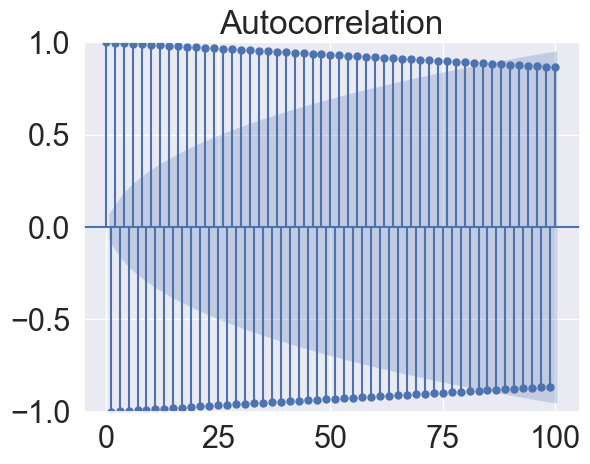

Los valores de ACF estan por encima de su umbral en un 100.0 %
Esto es un indicio de que la serie de tiempo es recurrente y presenta estacionalidad 



In [81]:
# ------------------------------------ ACF - ESTACIONALIDAD --------------------------------------------------------------------

print('Analisis ACF Estacionalidad')
# Obtener los valores de la componente de estacionalidad
try:
    descomp = seasonal_decompose(df_1["Precipitacion"], model='additive', period=2)
    seasonality = descomp.seasonal.dropna()
    
    plot_acf(seasonality, lags=100)
    plt.show()

    # calcular la ACF hasta un retraso máximo de 100
    lags = 100
    acf_vals, confint = acf(seasonality, nlags=lags, alpha=0.01)

except:
    descomp = seasonal_decompose(df_1["Precipitacion"], model='additive', period=1)
    seasonality = descomp.seasonal.dropna()

    plot_acf(seasonality, lags=1)
    plt.show()

    # calcular la ACF hasta un retraso máximo de 10
    lags = 1
    acf_vals, confint = acf(seasonality, nlags=lags, alpha=0.01)

# guardar los valores de la ACF en un dataframe
df_acf_s = pd.DataFrame({'Lag': range(len(acf_vals)),
                    'ACF': acf_vals,
                    'Lower CI': confint[:, 0],
                    'Upper CI': confint[:, 1]})
df_acf_s = df_acf_s[df_acf_s['Lag'] > 0].reset_index(drop = True)
#El umbral 0.9 se adecuo deacuerdo a la necesidad. En una distribucion normal el valor es 1.96
# Es decir El valor crítico para un nivel de confianza del 95% es 1.96
umbral = 0.9 * np.sqrt(abs(confint[1:, 0]) * abs(confint[1:, 1]))
df_acf_s['Umbral superior'] = umbral
df_acf_s['Umbral inferior'] = -umbral
count_5 = []
count_6 = []
for j in range(len(df_acf_s)):
    if df_acf_s['ACF'][j] < 0:
        if  df_acf_s['ACF'][j] < df_acf_s['Umbral inferior'][j]:
            count_5.append(j+1)
    if df_acf_s['ACF'][j] > 0:
        if  df_acf_s['ACF'][j] > df_acf_s['Umbral superior'][j]:
            count_6.append(j+1)
cuentas5 = len(count_5) + len(count_6)
umbrall5 = round((cuentas5/len(df_acf_s))*100,2)

if cuentas5 >= 1:
    print(f'Los valores de ACF estan por encima de su umbral en un {umbrall5} %')
    print(f"Esto es un indicio de que la serie de tiempo es recurrente y presenta estacionalidad \n")
    guardar6.append([i,1])


else:
    print(f'Los valores de ACF estan por debajo de su umbral en un {umbrall5} %')
    print(f"Esto es un indicio de que la serie de tiempo es NO recurrente y no presenta estacionalidad \n")
    guardar6.append([i,0])

In [82]:
# ---------------------------------------------------Auto ARIMA---------------------------------------------------------------------

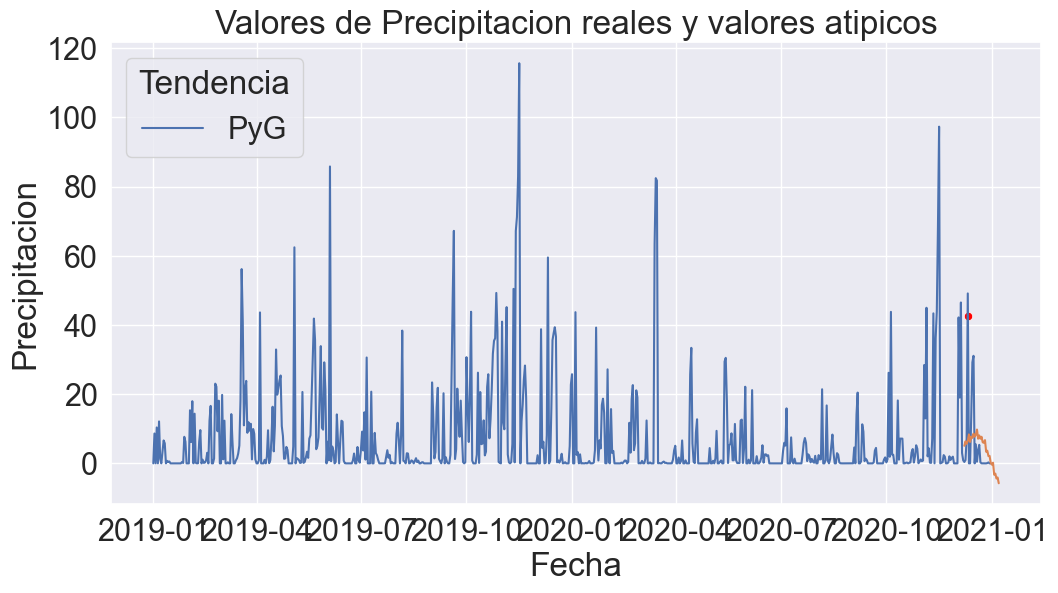

In [83]:
# -------------------------------------------------PROPHET ----------------------------------------------------------------------------
time_ = df_1.copy()
#time_ = time_.set_index(['Fecha']), no se coloca por que el df_1 ya tiene el index como fecha
time_ = time_[['Precipitacion']]
#print(time_)
dff2 = time_.reset_index(drop =False)
dff2 = dff2.rename(columns={"Fecha": "ds", "Precipitacion":"y",})
m = Prophet()
m.fit(dff2)
future = m.make_future_dataframe(periods=7, freq="1D")
future_train = future.iloc[:-7]
future  = future.iloc[-31:]
#print(future)


future_train.reset_index(inplace = True, drop = True)
future.reset_index(inplace = True, drop = True)

forecast_train = m.predict(future_train)
forecast = m.predict(future)
#print(forecast)


#m.plot(forecast_train)
#plt.show()

error = time_['Precipitacion'] - forecast.set_index('ds')['yhat'][:-7]
media = error.mean()
desv_std = error.std()
umbralh = 2 * desv_std
valores_atipicos = error[abs(error) > umbralh]
plt.figure(figsize=(12, 6))

# Crear el gráfico de línea con la serie temporal original
sns.lineplot(x=time_.index, y=time_['Precipitacion'])
sns.lineplot(x=forecast['ds'], y=forecast['yhat'] )
# Añadir los valores atípicos al gráfico como puntos rojos
sns.scatterplot(x=valores_atipicos.index, y=valores_atipicos, color='red')

# Configurar las etiquetas del eje x y y
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Valores de Precipitacion reales y valores atipicos')
plt.ylabel('Precipitacion')
plt.legend(title='Tendencia', loc='upper left', labels=['PyG'])
# Mostrar el gráfico
plt.show()
if len(valores_atipicos) >= 1:
    guardar2.append([i,1]) # hay atipicos

else:
    guardar2.append([i,0])

In [84]:
 # -------------------------------------- Analisis KPSS y ADF --------------------------------------------------------------------
print("Analisis KPSS \n")
stat, p, lags, crit = kpss(time_)
print('Estatística de prueba KPSS: ', stat)
print('Valor p: ', p)
print('Número de retardos utilizados: ', lags)
print('Valores críticos: \n', crit)

print("Prueba ADF \n")

adf = adfuller(time_)

# Extraer el valor p y el estadístico de la prueba

adf_statistic = adf[0]
p_value_adf = adf[1]
print('Valor p - ADF: ', p_value_adf)

# Evaluar la significancia estadística del resultado
#alpha = 0.05  # Nivel de significancia

if (p < 0.05) & (p_value_adf > 0.05):
    print('La serie de tiempo es no estacionaria, tiene recurrencia') # Si es no estacionaria puede ser que tenga algun patron de recurrencia
    guardar3.append([i,1])
else:
    print('La serie de tiempo es estacionaria,  no tiene recurrencia')
    guardar3.append([i,0])

Analisis KPSS 

Estatística de prueba KPSS:  0.2865294477986803
Valor p:  0.1
Número de retardos utilizados:  11
Valores críticos: 
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Prueba ADF 

Valor p - ADF:  3.3988580196490428e-25
La serie de tiempo es estacionaria,  no tiene recurrencia


Picos significativos: [0.00547196 0.03830369 0.04103967]


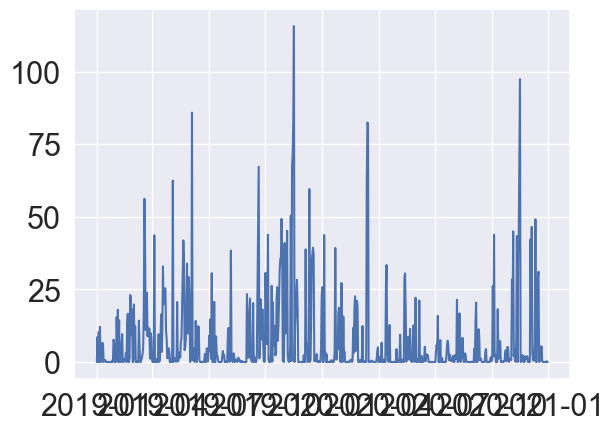

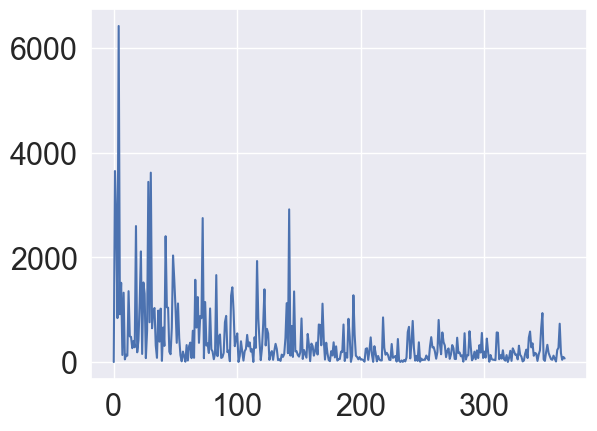

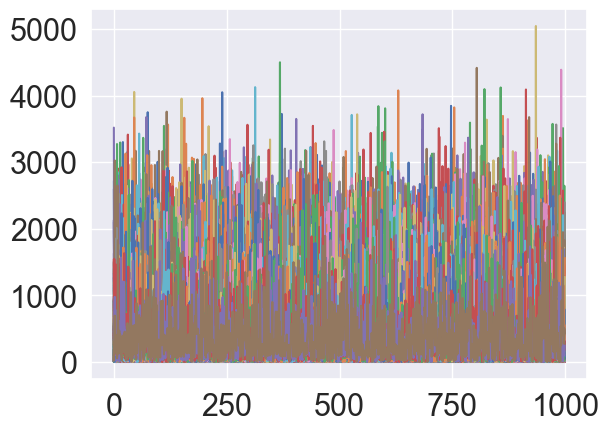

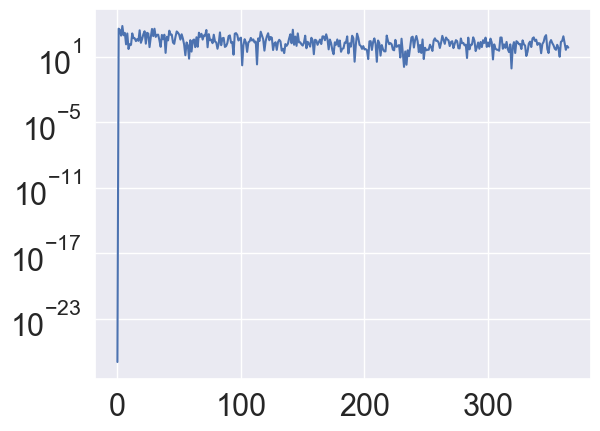

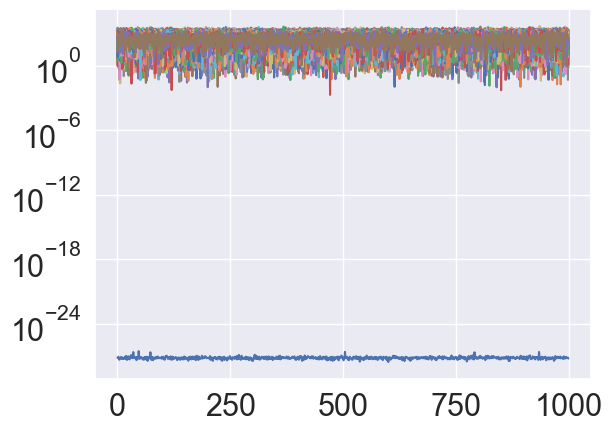

Los picos dela frecuencia son significativos, hay recurrencia


In [85]:
# ---------------------------------- Analisis espectral - valor P -------------------------------------------------------------------

frequencies, power_spectrum = signal.periodogram(df_1['Precipitacion'])

# Realizar la prueba de permutación
n_permutations = 1000
permutation_power_spectrum = []
for _ in range(n_permutations):
    permuted_data = np.random.permutation(df_1['Precipitacion'])
    _, permuted_spectrum = signal.periodogram(permuted_data)
    permutation_power_spectrum.append(permuted_spectrum)
permutation_power_spectrum = np.array(permutation_power_spectrum)

# Calcular el rango de los picos permutados
min_power = np.min(permutation_power_spectrum, axis=0)
max_power = np.max(permutation_power_spectrum, axis=0)
mean = permutation_power_spectrum.mean()
# Determinar si el pico es significativo
is_significant = (power_spectrum < min_power) | (power_spectrum > max_power)

# Imprimir los picos significativos
significant_peaks = frequencies[is_significant]
print("Picos significativos:", significant_peaks)
plt.plot(df_1['Precipitacion'])
plt.show()
plt.plot(power_spectrum)
plt.show()
plt.plot(permutation_power_spectrum)
plt.show()
plt.semilogy(power_spectrum)
plt.show()
plt.semilogy(permutation_power_spectrum)
plt.show()

# Determinar si el pico es significativo
if significant_peaks.size > 0:
    print("Los picos dela frecuencia son significativos, hay recurrencia")
    guardar5.append([i,1])

else:
    print("El pico en la frecuencia de interés no es significativo, no hay recurrencia")
    guardar5.append([i,0])

## **Seleccion de Features Importantes**

In [86]:
x = df[["Temperatura", 'Presion','Temperatura','Humedad','Radiacion']]
y = df["Precipitacion"]

In [87]:
scaler = StandardScaler()
X = scaler.fit_transform(x) 

In [88]:
rf = RandomForestRegressor(n_estimators = 80, random_state = 40)
rf_fit = rf.fit(X, y) 

In [89]:
rf_fit.feature_importances_

array([0.12021433, 0.29003916, 0.11886136, 0.30891653, 0.16196862])

<function matplotlib.pyplot.show(close=None, block=None)>

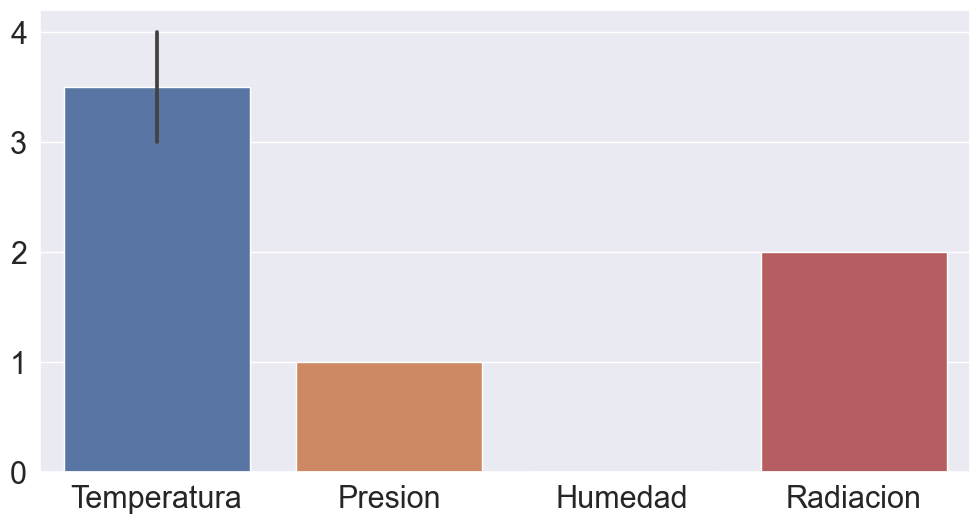

In [90]:
importances = rf_fit.feature_importances_
columns = x.columns 
indices = np.argsort(importances)[::-1]
plt.figure(figsize = (12,6))
sns.barplot(x=columns.values, y=indices)
plt.xticks(rotation=0)
plt.show